In [1]:
import pandas as pd
import re
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import string
import sklearn.metrics
import seaborn as sns
from statannot import add_stat_annotation
import scipy.stats as sts
import math
from sklearn.model_selection import ShuffleSplit
import plotly.express as px
import statistics
from standardize_format import standardized_maxquant_msms, standardized_CDAP_psm, standardized_Michi_psm, standardized_PNNL_report
from standardize_format import convert_to_psmtxt

In [7]:
#load identification results
#MaxQuant load results
df_maxquant = pd.read_csv("../data/CPTAC_UCEC_S043/MaxQuant/Refseq_results/msms.txt",
                          sep='\t',index_col=0)
df_maxquant = df_maxquant.loc[['01CPTAC_UCEC_P_PNNL_20170922_B1S1_f01',
                                 '01CPTAC_UCEC_P_PNNL_20170922_B1S1_f02',
                                 '01CPTAC_UCEC_P_PNNL_20170922_B1S1_f03',
                                 '01CPTAC_UCEC_P_PNNL_20170922_B1S1_f04',
                                 '01CPTAC_UCEC_P_PNNL_20170922_B1S1_f05',
                                 '01CPTAC_UCEC_P_PNNL_20170922_B1S1_f06',
                                 '01CPTAC_UCEC_P_PNNL_20170922_B1S1_f07',
                                 '01CPTAC_UCEC_P_PNNL_20170922_B1S1_f08',
                                 '01CPTAC_UCEC_P_PNNL_20170922_B1S1_f09',
                                 '01CPTAC_UCEC_P_PNNL_20170922_B1S1_f10',
                                 '01CPTAC_UCEC_P_PNNL_20170922_B1S1_f11',
                                 '01CPTAC_UCEC_P_PNNL_20170922_B1S1_f12']]
df_maxquant = df_maxquant[df_maxquant['Reverse']!='+']

/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (42,53,94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
#CDAP load results
CDAP_01 = pd.read_csv('../data/CPTAC_UCEC_S043/CDAP/CPTAC_UCEC_S043/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM.CAP.r1_tsv/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f01.psm',
                       sep='\t', index_col=0)
CDAP_02 = pd.read_csv('../data/CPTAC_UCEC_S043/CDAP/CPTAC_UCEC_S043/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM.CAP.r1_tsv/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f02.psm',
                       sep='\t', index_col=0)
CDAP_03 = pd.read_csv('../data/CPTAC_UCEC_S043/CDAP/CPTAC_UCEC_S043/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM.CAP.r1_tsv/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f03.psm',
                       sep='\t', index_col=0)
CDAP_04 = pd.read_csv('../data/CPTAC_UCEC_S043/CDAP/CPTAC_UCEC_S043/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM.CAP.r1_tsv/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f04.psm',
                       sep='\t', index_col=0)
CDAP_05 = pd.read_csv('../data/CPTAC_UCEC_S043/CDAP/CPTAC_UCEC_S043/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM.CAP.r1_tsv/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f05.psm',
                       sep='\t', index_col=0)
CDAP_06 = pd.read_csv('../data/CPTAC_UCEC_S043/CDAP/CPTAC_UCEC_S043/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM.CAP.r1_tsv/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f06.psm',
                       sep='\t', index_col=0)
CDAP_07 = pd.read_csv('../data/CPTAC_UCEC_S043/CDAP/CPTAC_UCEC_S043/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM.CAP.r1_tsv/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f07.psm',
                       sep='\t', index_col=0)
CDAP_08 = pd.read_csv('../data/CPTAC_UCEC_S043/CDAP/CPTAC_UCEC_S043/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM.CAP.r1_tsv/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f08.psm',
                       sep='\t', index_col=0)
CDAP_09 = pd.read_csv('../data/CPTAC_UCEC_S043/CDAP/CPTAC_UCEC_S043/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM.CAP.r1_tsv/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f09.psm',
                       sep='\t', index_col=0)
CDAP_10 = pd.read_csv('../data/CPTAC_UCEC_S043/CDAP/CPTAC_UCEC_S043/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM.CAP.r1_tsv/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f10.psm',
                       sep='\t', index_col=0)
CDAP_11 = pd.read_csv('../data/CPTAC_UCEC_S043/CDAP/CPTAC_UCEC_S043/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM.CAP.r1_tsv/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f11.psm',
                       sep='\t', index_col=0)
CDAP_12 = pd.read_csv('../data/CPTAC_UCEC_S043/CDAP/CPTAC_UCEC_S043/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM/01CPTAC_UCEC_Phosphoproteome_PNNL_20170922_PSM.CAP.r1_tsv/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f12.psm',
                       sep='\t', index_col=0)
CDAP = pd.concat([CDAP_01,CDAP_02,CDAP_03,CDAP_04,CDAP_05,CDAP_06,CDAP_07,CDAP_08,CDAP_09,CDAP_10,CDAP_11,CDAP_12])
del CDAP_01,CDAP_02,CDAP_03,CDAP_04,CDAP_05,CDAP_06,CDAP_07,CDAP_08,CDAP_09,CDAP_10,CDAP_11,CDAP_12
#extract retention time
CDAP_rt_01 = pd.read_csv('../data/CPTAC_UCEC_S043/mzML/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f01_rt.txt',sep='\t', index_col=0)
CDAP_rt_01=CDAP_rt_01[CDAP_rt_01['ms_level']==2]
CDAP_rt_02 = pd.read_csv('../data/CPTAC_UCEC_S043/mzML/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f02_rt.txt',sep='\t', index_col=0)
CDAP_rt_02=CDAP_rt_02[CDAP_rt_02['ms_level']==2]
CDAP_rt_03 = pd.read_csv('../data/CPTAC_UCEC_S043/mzML/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f03_rt.txt',sep='\t', index_col=0)
CDAP_rt_03=CDAP_rt_03[CDAP_rt_03['ms_level']==2]
CDAP_rt_04 = pd.read_csv('../data/CPTAC_UCEC_S043/mzML/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f04_rt.txt',sep='\t', index_col=0)
CDAP_rt_04=CDAP_rt_04[CDAP_rt_04['ms_level']==2]
CDAP_rt_05 = pd.read_csv('../data/CPTAC_UCEC_S043/mzML/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f05_rt.txt',sep='\t', index_col=0)
CDAP_rt_05=CDAP_rt_05[CDAP_rt_05['ms_level']==2]
CDAP_rt_06 = pd.read_csv('../data/CPTAC_UCEC_S043/mzML/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f06_rt.txt',sep='\t', index_col=0)
CDAP_rt_06=CDAP_rt_06[CDAP_rt_06['ms_level']==2]
CDAP_rt_07 = pd.read_csv('../data/CPTAC_UCEC_S043/mzML/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f07_rt.txt',sep='\t', index_col=0)
CDAP_rt_07=CDAP_rt_07[CDAP_rt_07['ms_level']==2]
CDAP_rt_08 = pd.read_csv('../data/CPTAC_UCEC_S043/mzML/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f08_rt.txt',sep='\t', index_col=0)
CDAP_rt_08=CDAP_rt_08[CDAP_rt_08['ms_level']==2]
CDAP_rt_09 = pd.read_csv('../data/CPTAC_UCEC_S043/mzML/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f09_rt.txt',sep='\t', index_col=0)
CDAP_rt_09=CDAP_rt_09[CDAP_rt_09['ms_level']==2]
CDAP_rt_10 = pd.read_csv('../data/CPTAC_UCEC_S043/mzML/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f10_rt.txt',sep='\t', index_col=0)
CDAP_rt_10=CDAP_rt_10[CDAP_rt_10['ms_level']==2]
CDAP_rt_11 = pd.read_csv('../data/CPTAC_UCEC_S043/mzML/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f11_rt.txt',sep='\t', index_col=0)
CDAP_rt_11=CDAP_rt_11[CDAP_rt_11['ms_level']==2]
CDAP_rt_12 = pd.read_csv('../data/CPTAC_UCEC_S043/mzML/01CPTAC_UCEC_P_PNNL_20170922_B1S1_f12_rt.txt',sep='\t', index_col=0)
CDAP_rt_12=CDAP_rt_12[CDAP_rt_12['ms_level']==2]

In [9]:
#MS-GF+/Ascore load results
PNNL_report = pd.read_csv("../data/CPTAC_UCEC_S043/MS-GF+Ascore/ucec_phospho_msms_v2/ucec_phospho_msms_data_filtered_with_rt.txt",
                         sep="\t")

In [10]:
#FragPipe load results
Michi = pd.read_csv('../data/CPTAC_UCEC_S043/FragPipe/results/01CPTAC_UCEC_P_PNNL_20170922.tsv',
                   sep='\t')

In [ ]:
#Standardized:file name, scannum, peptide(lower), sequence(upper), rt, score
#site prob filter (0.75)
#FragPipe
Michi=standardized_Michi_psm(Michi)
Michi_not_filtered=Michi
Michi=Michi[Michi['Acceptance']=='y']
# Michi.to_pickle('../data/AutoRT_data/UCEC/standardized_df/Michi_venn.pkl')
# Michi_not_filtered.to_pickle('../data/AutoRT_data/UCEC/standardized_df/Michi_not_filtered_venn.pkl')

In [5]:
#Standardized:file name, scannum, peptide(lower), sequence(upper), rt, score
#Fullylocalized=='Y'
#CDAP
CDAP_not_filtered=standardized_CDAP_psm(CDAP)
CDAP=CDAP_not_filtered[CDAP_not_filtered['FullyLocalized']=='Y']
# CDAP.to_pickle('../data/AutoRT_data/UCEC/standardized_df/CDAP_venn.pkl')
# CDAP_not_filtered.to_pickle('../data/AutoRT_data/UCEC/standardized_df/CDAP_not_filtered_venn.pkl')

In [ ]:
#CDAP add RT
CDAP['retention time'] = pd.Series([0 for x in range(len(CDAP.index))])
for i in range(len(CDAP)):
    if CDAP.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f01':
        CDAP['retention time'].iloc[i]=CDAP_rt_01[CDAP_rt_01.index==CDAP.scan.iloc[i]].rt.iloc[0]
        continue
    if CDAP.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f02':
        CDAP['retention time'].iloc[i]=CDAP_rt_02[CDAP_rt_02.index==CDAP.scan.iloc[i]].rt.iloc[0]
        continue
    if CDAP.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f03':
        CDAP['retention time'].iloc[i]=CDAP_rt_03[CDAP_rt_03.index==CDAP.scan.iloc[i]].rt.iloc[0]
        continue
    if CDAP.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f04':
        CDAP['retention time'].iloc[i]=CDAP_rt_04[CDAP_rt_04.index==CDAP.scan.iloc[i]].rt.iloc[0]
        continue
    if CDAP.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f05':
        CDAP['retention time'].iloc[i]=CDAP_rt_05[CDAP_rt_05.index==CDAP.scan.iloc[i]].rt.iloc[0]
        continue
    if CDAP.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f06':
        CDAP['retention time'].iloc[i]=CDAP_rt_06[CDAP_rt_06.index==CDAP.scan.iloc[i]].rt.iloc[0]
        continue
    if CDAP.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f07':
        CDAP['retention time'].iloc[i]=CDAP_rt_07[CDAP_rt_07.index==CDAP.scan.iloc[i]].rt.iloc[0]
        continue
    if CDAP.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f08':
        CDAP['retention time'].iloc[i]=CDAP_rt_08[CDAP_rt_08.index==CDAP.scan.iloc[i]].rt.iloc[0]
        continue
    if CDAP.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f09':
        CDAP['retention time'].iloc[i]=CDAP_rt_09[CDAP_rt_09.index==CDAP.scan.iloc[i]].rt.iloc[0]
        continue
    if CDAP.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f10':
        CDAP['retention time'].iloc[i]=CDAP_rt_10[CDAP_rt_10.index==CDAP.scan.iloc[i]].rt.iloc[0]
        continue
    if CDAP.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f11':
        CDAP['retention time'].iloc[i]=CDAP_rt_11[CDAP_rt_11.index==CDAP.scan.iloc[i]].rt.iloc[0]
        continue
    if CDAP.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f12':
        CDAP['retention time'].iloc[i]=CDAP_rt_12[CDAP_rt_12.index==CDAP.scan.iloc[i]].rt.iloc[0]
        continue
#CDAP.to_pickle('../data/AutoRT_data/UCEC/standardized_df/CDAP_w_rt.pkl')

In [11]:
#Standardized:file name, scannum, peptide(lower), sequence(upper), rt, score
#ascore > 13
#MS-GF+/Ascore
PNNL_exp=[]
index=[]
for i in range(len(PNNL_report)):
    item = PNNL_report.Dataset[i].split('_')
    if item[5] == 'B1S1':
        PNNL_exp.append('01CPTAC_UCEC_P_PNNL_20170922_B1S1_'+item[6])
        index.append(i)
PNNL=PNNL_report.loc[index]
PNNL['exp'] = np.array(PNNL_exp)
#Standardized:file name, scannum, peptide(lower), sequence(upper), rt, score
#PNNL
PNNL_not_filtered=standardized_PNNL_report(PNNL)
PNNL=PNNL_not_filtered[PNNL_not_filtered['ascore']>13]
# PNNL.to_pickle('../data/AutoRT_data/UCEC/standardized_df/PNNL_venn.pkl')
# PNNL_not_filtered.to_pickle('../data/AutoRT_data/UCEC/standardized_df/PNNL_not_filtered_venn.pkl')
del PNNL_report

/Users/jiangwen/CNShunter Dropbox/Benchmark/github/scripts/standardize_format.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PNNL['phosphopep'] = pd.Series(seq_PNNL).values
/Users/jiangwen/CNShunter Dropbox/Benchmark/github/scripts/standardize_format.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PNNL.drop_duplicates(keep=False,inplace=True)


In [12]:
#MS-GF+/Ascore add RT
PNNL['retention time'] = pd.Series([0 for x in range(len(PNNL.index))])
PNNL_scan=PNNL.scan.tolist()
PNNL_rt=[]
for i in range(len(PNNL)):
    print(i)
    if PNNL.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f01':
        PNNL_rt.append(CDAP_rt_01[CDAP_rt_01.index==PNNL_scan[i]].rt.iloc[0])
        continue
    if PNNL.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f02':
        PNNL_rt.append(CDAP_rt_02[CDAP_rt_02.index==PNNL_scan[i]].rt.iloc[0])
        continue
    if PNNL.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f03':
        PNNL_rt.append(CDAP_rt_03[CDAP_rt_03.index==PNNL_scan[i]].rt.iloc[0])
        continue
    if PNNL.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f04':
        PNNL_rt.append(CDAP_rt_04[CDAP_rt_04.index==PNNL_scan[i]].rt.iloc[0])
        continue
    if PNNL.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f05':
        PNNL_rt.append(CDAP_rt_05[CDAP_rt_05.index==PNNL_scan[i]].rt.iloc[0])
        continue
    if PNNL.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f06':
        PNNL_rt.append(CDAP_rt_06[CDAP_rt_06.index==PNNL_scan[i]].rt.iloc[0])
        continue
    if PNNL.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f07':
        PNNL_rt.append(CDAP_rt_07[CDAP_rt_07.index==PNNL_scan[i]].rt.iloc[0])
        continue
    if PNNL.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f08':
        PNNL_rt.append(CDAP_rt_08[CDAP_rt_08.index==PNNL_scan[i]].rt.iloc[0])
        continue
    if PNNL.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f09':
        PNNL_rt.append(CDAP_rt_09[CDAP_rt_09.index==PNNL_scan[i]].rt.iloc[0])
        continue
    if PNNL.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f10':
        PNNL_rt.append(CDAP_rt_10[CDAP_rt_10.index==PNNL_scan[i]].rt.iloc[0])
        continue
    if PNNL.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f11':
        PNNL_rt.append(CDAP_rt_11[CDAP_rt_11.index==PNNL_scan[i]].rt.iloc[0])
        continue
    if PNNL.exp.iloc[i]=='01CPTAC_UCEC_P_PNNL_20170922_B1S1_f12':
        PNNL_rt.append(CDAP_rt_12[CDAP_rt_12.index==PNNL_scan[i]].rt.iloc[0])
        continue
PNNL['retention time']=np.array(PNNL_rt)
#PNNL.to_pickle('../data/AutoRT_data/UCEC/standardized_df/PNNL_w_rt.pkl')

<ipython-input-12-d9aebf6aa515>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PNNL['retention time'] = pd.Series([0 for x in range(len(PNNL.index))])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116


3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122


5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083


7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904
7905
7906
7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7917
7918
7919
7920
7921
7922
7923
7924
7925
7926
7927
7928
7929
7930
7931
7932
7933
7934
7935
7936
7937
7938
7939
7940
7941
7942
7943
7944
7945
7946
7947
7948
7949
7950
7951
7952
7953
7954
7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981
7982
7983
7984
7985
7986
7987
7988
7989
7990
7991
7992


9757
9758
9759
9760
9761
9762
9763
9764
9765
9766
9767
9768
9769
9770
9771
9772
9773
9774
9775
9776
9777
9778
9779
9780
9781
9782
9783
9784
9785
9786
9787
9788
9789
9790
9791
9792
9793
9794
9795
9796
9797
9798
9799
9800
9801
9802
9803
9804
9805
9806
9807
9808
9809
9810
9811
9812
9813
9814
9815
9816
9817
9818
9819
9820
9821
9822
9823
9824
9825
9826
9827
9828
9829
9830
9831
9832
9833
9834
9835
9836
9837
9838
9839
9840
9841
9842
9843
9844
9845
9846
9847
9848
9849
9850
9851
9852
9853
9854
9855
9856
9857
9858
9859
9860
9861
9862
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878
9879
9880
9881
9882
9883
9884
9885
9886
9887
9888
9889
9890
9891
9892
9893
9894
9895
9896
9897
9898
9899
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956


11205
11206
11207
11208
11209
11210
11211
11212
11213
11214
11215
11216
11217
11218
11219
11220
11221
11222
11223
11224
11225
11226
11227
11228
11229
11230
11231
11232
11233
11234
11235
11236
11237
11238
11239
11240
11241
11242
11243
11244
11245
11246
11247
11248
11249
11250
11251
11252
11253
11254
11255
11256
11257
11258
11259
11260
11261
11262
11263
11264
11265
11266
11267
11268
11269
11270
11271
11272
11273
11274
11275
11276
11277
11278
11279
11280
11281
11282
11283
11284
11285
11286
11287
11288
11289
11290
11291
11292
11293
11294
11295
11296
11297
11298
11299
11300
11301
11302
11303
11304
11305
11306
11307
11308
11309
11310
11311
11312
11313
11314
11315
11316
11317
11318
11319
11320
11321
11322
11323
11324
11325
11326
11327
11328
11329
11330
11331
11332
11333
11334
11335
11336
11337
11338
11339
11340
11341
11342
11343
11344
11345
11346
11347
11348
11349
11350
11351
11352
11353
11354
11355
11356
11357
11358
11359
11360
11361
11362
11363
11364
11365
11366
11367
11368
11369
11370
1137

12652
12653
12654
12655
12656
12657
12658
12659
12660
12661
12662
12663
12664
12665
12666
12667
12668
12669
12670
12671
12672
12673
12674
12675
12676
12677
12678
12679
12680
12681
12682
12683
12684
12685
12686
12687
12688
12689
12690
12691
12692
12693
12694
12695
12696
12697
12698
12699
12700
12701
12702
12703
12704
12705
12706
12707
12708
12709
12710
12711
12712
12713
12714
12715
12716
12717
12718
12719
12720
12721
12722
12723
12724
12725
12726
12727
12728
12729
12730
12731
12732
12733
12734
12735
12736
12737
12738
12739
12740
12741
12742
12743
12744
12745
12746
12747
12748
12749
12750
12751
12752
12753
12754
12755
12756
12757
12758
12759
12760
12761
12762
12763
12764
12765
12766
12767
12768
12769
12770
12771
12772
12773
12774
12775
12776
12777
12778
12779
12780
12781
12782
12783
12784
12785
12786
12787
12788
12789
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
1281

14108
14109
14110
14111
14112
14113
14114
14115
14116
14117
14118
14119
14120
14121
14122
14123
14124
14125
14126
14127
14128
14129
14130
14131
14132
14133
14134
14135
14136
14137
14138
14139
14140
14141
14142
14143
14144
14145
14146
14147
14148
14149
14150
14151
14152
14153
14154
14155
14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
1427

15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
1571

16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
1714

18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18455
18456
18457
18458
18459
18460
18461
18462
18463
18464
18465
18466
18467
18468
18469
18470
18471
18472
18473
18474
18475
18476
18477
18478
18479
18480
18481
18482
18483
18484
18485
18486
18487
18488
18489
18490
18491
18492
18493
18494
18495
18496
18497
18498
18499
18500
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18524
18525
18526
18527
18528
18529
18530
18531
18532
18533
18534
18535
18536
18537
18538
18539
18540
18541
18542
18543
18544
18545
18546
18547
18548
18549
18550
18551
18552
18553
18554
18555
18556
18557
18558
18559
18560
18561
18562
18563
18564
18565
18566
18567
18568
18569
18570
18571
18572
18573
18574
18575
18576
18577
18578
18579
18580
18581
18582
1858

19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
19846
19847
19848
19849
19850
19851
19852
19853
19854
19855
19856
19857
19858
19859
19860
19861
19862
19863
19864
19865
19866
19867
19868
19869
19870
19871
19872
19873
19874
19875
19876
19877
19878
19879
19880
19881
19882
19883
19884
19885
19886
19887
19888
19889
19890
19891
19892
19893
19894
19895
19896
19897
19898
19899
19900
19901
19902
19903
19904
19905
19906
19907
19908
19909
19910
19911
19912
19913
19914
19915
19916
19917
19918
19919
19920
19921
19922
19923
19924
19925
19926
19927
19928
19929
19930
19931
19932
19933
19934
19935
19936
19937
19938
19939
19940
19941
19942
19943
19944
19945
19946
19947
19948
19949
19950
19951
19952
19953
19954
19955
19956
19957
19958
19959
19960
19961
19962
19963
19964
19965
19966
19967
19968
19969
19970
19971
19972
19973
19974
19975
19976
19977
19978
19979
19980
19981
19982
19983
19984
19985
19986
19987
19988
19989
19990
19991
19992
19993
19994
19995
19996
19997
19998
1999

21664
21665
21666
21667
21668
21669
21670
21671
21672
21673
21674
21675
21676
21677
21678
21679
21680
21681
21682
21683
21684
21685
21686
21687
21688
21689
21690
21691
21692
21693
21694
21695
21696
21697
21698
21699
21700
21701
21702
21703
21704
21705
21706
21707
21708
21709
21710
21711
21712
21713
21714
21715
21716
21717
21718
21719
21720
21721
21722
21723
21724
21725
21726
21727
21728
21729
21730
21731
21732
21733
21734
21735
21736
21737
21738
21739
21740
21741
21742
21743
21744
21745
21746
21747
21748
21749
21750
21751
21752
21753
21754
21755
21756
21757
21758
21759
21760
21761
21762
21763
21764
21765
21766
21767
21768
21769
21770
21771
21772
21773
21774
21775
21776
21777
21778
21779
21780
21781
21782
21783
21784
21785
21786
21787
21788
21789
21790
21791
21792
21793
21794
21795
21796
21797
21798
21799
21800
21801
21802
21803
21804
21805
21806
21807
21808
21809
21810
21811
21812
21813
21814
21815
21816
21817
21818
21819
21820
21821
21822
21823
21824
21825
21826
21827
21828
21829
2183

23328
23329
23330
23331
23332
23333
23334
23335
23336
23337
23338
23339
23340
23341
23342
23343
23344
23345
23346
23347
23348
23349
23350
23351
23352
23353
23354
23355
23356
23357
23358
23359
23360
23361
23362
23363
23364
23365
23366
23367
23368
23369
23370
23371
23372
23373
23374
23375
23376
23377
23378
23379
23380
23381
23382
23383
23384
23385
23386
23387
23388
23389
23390
23391
23392
23393
23394
23395
23396
23397
23398
23399
23400
23401
23402
23403
23404
23405
23406
23407
23408
23409
23410
23411
23412
23413
23414
23415
23416
23417
23418
23419
23420
23421
23422
23423
23424
23425
23426
23427
23428
23429
23430
23431
23432
23433
23434
23435
23436
23437
23438
23439
23440
23441
23442
23443
23444
23445
23446
23447
23448
23449
23450
23451
23452
23453
23454
23455
23456
23457
23458
23459
23460
23461
23462
23463
23464
23465
23466
23467
23468
23469
23470
23471
23472
23473
23474
23475
23476
23477
23478
23479
23480
23481
23482
23483
23484
23485
23486
23487
23488
23489
23490
23491
23492
23493
2349

24694
24695
24696
24697
24698
24699
24700
24701
24702
24703
24704
24705
24706
24707
24708
24709
24710
24711
24712
24713
24714
24715
24716
24717
24718
24719
24720
24721
24722
24723
24724
24725
24726
24727
24728
24729
24730
24731
24732
24733
24734
24735
24736
24737
24738
24739
24740
24741
24742
24743
24744
24745
24746
24747
24748
24749
24750
24751
24752
24753
24754
24755
24756
24757
24758
24759
24760
24761
24762
24763
24764
24765
24766
24767
24768
24769
24770
24771
24772
24773
24774
24775
24776
24777
24778
24779
24780
24781
24782
24783
24784
24785
24786
24787
24788
24789
24790
24791
24792
24793
24794
24795
24796
24797
24798
24799
24800
24801
24802
24803
24804
24805
24806
24807
24808
24809
24810
24811
24812
24813
24814
24815
24816
24817
24818
24819
24820
24821
24822
24823
24824
24825
24826
24827
24828
24829
24830
24831
24832
24833
24834
24835
24836
24837
24838
24839
24840
24841
24842
24843
24844
24845
24846
24847
24848
24849
24850
24851
24852
24853
24854
24855
24856
24857
24858
24859
2486

26124
26125
26126
26127
26128
26129
26130
26131
26132
26133
26134
26135
26136
26137
26138
26139
26140
26141
26142
26143
26144
26145
26146
26147
26148
26149
26150
26151
26152
26153
26154
26155
26156
26157
26158
26159
26160
26161
26162
26163
26164
26165
26166
26167
26168
26169
26170
26171
26172
26173
26174
26175
26176
26177
26178
26179
26180
26181
26182
26183
26184
26185
26186
26187
26188
26189
26190
26191
26192
26193
26194
26195
26196
26197
26198
26199
26200
26201
26202
26203
26204
26205
26206
26207
26208
26209
26210
26211
26212
26213
26214
26215
26216
26217
26218
26219
26220
26221
26222
26223
26224
26225
26226
26227
26228
26229
26230
26231
26232
26233
26234
26235
26236
26237
26238
26239
26240
26241
26242
26243
26244
26245
26246
26247
26248
26249
26250
26251
26252
26253
26254
26255
26256
26257
26258
26259
26260
26261
26262
26263
26264
26265
26266
26267
26268
26269
26270
26271
26272
26273
26274
26275
26276
26277
26278
26279
26280
26281
26282
26283
26284
26285
26286
26287
26288
26289
2629

27527
27528
27529
27530
27531
27532
27533
27534
27535
27536
27537
27538
27539
27540
27541
27542
27543
27544
27545
27546
27547
27548
27549
27550
27551
27552
27553
27554
27555
27556
27557
27558
27559
27560
27561
27562
27563
27564
27565
27566
27567
27568
27569
27570
27571
27572
27573
27574
27575
27576
27577
27578
27579
27580
27581
27582
27583
27584
27585
27586
27587
27588
27589
27590
27591
27592
27593
27594
27595
27596
27597
27598
27599
27600
27601
27602
27603
27604
27605
27606
27607
27608
27609
27610
27611
27612
27613
27614
27615
27616
27617
27618
27619
27620
27621
27622
27623
27624
27625
27626
27627
27628
27629
27630
27631
27632
27633
27634
27635
27636
27637
27638
27639
27640
27641
27642
27643
27644
27645
27646
27647
27648
27649
27650
27651
27652
27653
27654
27655
27656
27657
27658
27659
27660
27661
27662
27663
27664
27665
27666
27667
27668
27669
27670
27671
27672
27673
27674
27675
27676
27677
27678
27679
27680
27681
27682
27683
27684
27685
27686
27687
27688
27689
27690
27691
27692
2769

28939
28940
28941
28942
28943
28944
28945
28946
28947
28948
28949
28950
28951
28952
28953
28954
28955
28956
28957
28958
28959
28960
28961
28962
28963
28964
28965
28966
28967
28968
28969
28970
28971
28972
28973
28974
28975
28976
28977
28978
28979
28980
28981
28982
28983
28984
28985
28986
28987
28988
28989
28990
28991
28992
28993
28994
28995
28996
28997
28998
28999
29000
29001
29002
29003
29004
29005
29006
29007
29008
29009
29010
29011
29012
29013
29014
29015
29016
29017
29018
29019
29020
29021
29022
29023
29024
29025
29026
29027
29028
29029
29030
29031
29032
29033
29034
29035
29036
29037
29038
29039
29040
29041
29042
29043
29044
29045
29046
29047
29048
29049
29050
29051
29052
29053
29054
29055
29056
29057
29058
29059
29060
29061
29062
29063
29064
29065
29066
29067
29068
29069
29070
29071
29072
29073
29074
29075
29076
29077
29078
29079
29080
29081
29082
29083
29084
29085
29086
29087
29088
29089
29090
29091
29092
29093
29094
29095
29096
29097
29098
29099
29100
29101
29102
29103
29104
2910

30365
30366
30367
30368
30369
30370
30371
30372
30373
30374
30375
30376
30377
30378
30379
30380
30381
30382
30383
30384
30385
30386
30387
30388
30389
30390
30391
30392
30393
30394
30395
30396
30397
30398
30399
30400
30401
30402
30403
30404
30405
30406
30407
30408
30409
30410
30411
30412
30413
30414
30415
30416
30417
30418
30419
30420
30421
30422
30423
30424
30425
30426
30427
30428
30429
30430
30431
30432
30433
30434
30435
30436
30437
30438
30439
30440
30441
30442
30443
30444
30445
30446
30447
30448
30449
30450
30451
30452
30453
30454
30455
30456
30457
30458
30459
30460
30461
30462
30463
30464
30465
30466
30467
30468
30469
30470
30471
30472
30473
30474
30475
30476
30477
30478
30479
30480
30481
30482
30483
30484
30485
30486
30487
30488
30489
30490
30491
30492
30493
30494
30495
30496
30497
30498
30499
30500
30501
30502
30503
30504
30505
30506
30507
30508
30509
30510
30511
30512
30513
30514
30515
30516
30517
30518
30519
30520
30521
30522
30523
30524
30525
30526
30527
30528
30529
30530
3053

31731
31732
31733
31734
31735
31736
31737
31738
31739
31740
31741
31742
31743
31744
31745
31746
31747
31748
31749
31750
31751
31752
31753
31754
31755
31756
31757
31758
31759
31760
31761
31762
31763
31764
31765
31766
31767
31768
31769
31770
31771
31772
31773
31774
31775
31776
31777
31778
31779
31780
31781
31782
31783
31784
31785
31786
31787
31788
31789
31790
31791
31792
31793
31794
31795
31796
31797
31798
31799
31800
31801
31802
31803
31804
31805
31806
31807
31808
31809
31810
31811
31812
31813
31814
31815
31816
31817
31818
31819
31820
31821
31822
31823
31824
31825
31826
31827
31828
31829
31830
31831
31832
31833
31834
31835
31836
31837
31838
31839
31840
31841
31842
31843
31844
31845
31846
31847
31848
31849
31850
31851
31852
31853
31854
31855
31856
31857
31858
31859
31860
31861
31862
31863
31864
31865
31866
31867
31868
31869
31870
31871
31872
31873
31874
31875
31876
31877
31878
31879
31880
31881
31882
31883
31884
31885
31886
31887
31888
31889
31890
31891
31892
31893
31894
31895
31896
3189

33122
33123
33124
33125
33126
33127
33128
33129
33130
33131
33132
33133
33134
33135
33136
33137
33138
33139
33140
33141
33142
33143
33144
33145
33146
33147
33148
33149
33150
33151
33152
33153
33154
33155
33156
33157
33158
33159
33160
33161
33162
33163
33164
33165
33166
33167
33168
33169
33170
33171
33172
33173
33174
33175
33176
33177
33178
33179
33180
33181
33182
33183
33184
33185
33186
33187
33188
33189
33190
33191
33192
33193
33194
33195
33196
33197
33198
33199
33200
33201
33202
33203
33204
33205
33206
33207
33208
33209
33210
33211
33212
33213
33214
33215
33216
33217
33218
33219
33220
33221
33222
33223
33224
33225
33226
33227
33228
33229
33230
33231
33232
33233
33234
33235
33236
33237
33238
33239
33240
33241
33242
33243
33244
33245
33246
33247
33248
33249
33250
33251
33252
33253
33254
33255
33256
33257
33258
33259
33260
33261
33262
33263
33264
33265
33266
33267
33268
33269
33270
33271
33272
33273
33274
33275
33276
33277
33278
33279
33280
33281
33282
33283
33284
33285
33286
33287
3328

34888
34889
34890
34891
34892
34893
34894
34895
34896
34897
34898
34899
34900
34901
34902
34903
34904
34905
34906
34907
34908
34909
34910
34911
34912
34913
34914
34915
34916
34917
34918
34919
34920
34921
34922
34923
34924
34925
34926
34927
34928
34929
34930
34931
34932
34933
34934
34935
34936
34937
34938
34939
34940
34941
34942
34943
34944
34945
34946
34947
34948
34949
34950
34951
34952
34953
34954
34955
34956
34957
34958
34959
34960
34961
34962
34963
34964
34965
34966
34967
34968
34969
34970
34971
34972
34973
34974
34975
34976
34977
34978
34979
34980
34981
34982
34983
34984
34985
34986
34987
34988
34989
34990
34991
34992
34993
34994
34995
34996
34997
34998
34999
35000
35001
35002
35003
35004
35005
35006
35007
35008
35009
35010
35011
35012
35013
35014
35015
35016
35017
35018
35019
35020
35021
35022
35023
35024
35025
35026
35027
35028
35029
35030
35031
35032
35033
35034
35035
35036
35037
35038
35039
35040
35041
35042
35043
35044
35045
35046
35047
35048
35049
35050
35051
35052
35053
3505

36660
36661
36662
36663
36664
36665
36666
36667
36668
36669
36670
36671
36672
36673
36674
36675
36676
36677
36678
36679
36680
36681
36682
36683
36684
36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
36728
36729
36730
36731
36732
36733
36734
36735
36736
36737
36738
36739
36740
36741
36742
36743
36744
36745
36746
36747
36748
36749
36750
36751
36752
36753
36754
36755
36756
36757
36758
36759
36760
36761
36762
36763
36764
36765
36766
36767
36768
36769
36770
36771
36772
36773
36774
36775
36776
36777
36778
36779
36780
36781
36782
36783
36784
36785
36786
36787
36788
36789
36790
36791
36792
36793
36794
36795
36796
36797
36798
36799
36800
36801
36802
36803
36804
36805
36806
36807
36808
36809
36810
36811
36812
36813
36814
36815
36816
36817
36818
36819
36820
36821
36822
36823
36824
36825
3682

38499
38500
38501
38502
38503
38504
38505
38506
38507
38508
38509
38510
38511
38512
38513
38514
38515
38516
38517
38518
38519
38520
38521
38522
38523
38524
38525
38526
38527
38528
38529
38530
38531
38532
38533
38534
38535
38536
38537
38538
38539
38540
38541
38542
38543
38544
38545
38546
38547
38548
38549
38550
38551
38552
38553
38554
38555
38556
38557
38558
38559
38560
38561
38562
38563
38564
38565
38566
38567
38568
38569
38570
38571
38572
38573
38574
38575
38576
38577
38578
38579
38580
38581
38582
38583
38584
38585
38586
38587
38588
38589
38590
38591
38592
38593
38594
38595
38596
38597
38598
38599
38600
38601
38602
38603
38604
38605
38606
38607
38608
38609
38610
38611
38612
38613
38614
38615
38616
38617
38618
38619
38620
38621
38622
38623
38624
38625
38626
38627
38628
38629
38630
38631
38632
38633
38634
38635
38636
38637
38638
38639
38640
38641
38642
38643
38644
38645
38646
38647
38648
38649
38650
38651
38652
38653
38654
38655
38656
38657
38658
38659
38660
38661
38662
38663
38664
3866

40320
40321
40322
40323
40324
40325
40326
40327
40328
40329
40330
40331
40332
40333
40334
40335
40336
40337
40338
40339
40340
40341
40342
40343
40344
40345
40346
40347
40348
40349
40350
40351
40352
40353
40354
40355
40356
40357
40358
40359
40360
40361
40362
40363
40364
40365
40366
40367
40368
40369
40370
40371
40372
40373
40374
40375
40376
40377
40378
40379
40380
40381
40382
40383
40384
40385
40386
40387
40388
40389
40390
40391
40392
40393
40394
40395
40396
40397
40398
40399
40400
40401
40402
40403
40404
40405
40406
40407
40408
40409
40410
40411
40412
40413
40414
40415
40416
40417
40418
40419
40420
40421
40422
40423
40424
40425
40426
40427
40428
40429
40430
40431
40432
40433
40434
40435
40436
40437
40438
40439
40440
40441
40442
40443
40444
40445
40446
40447
40448
40449
40450
40451
40452
40453
40454
40455
40456
40457
40458
40459
40460
40461
40462
40463
40464
40465
40466
40467
40468
40469
40470
40471
40472
40473
40474
40475
40476
40477
40478
40479
40480
40481
40482
40483
40484
40485
4048

42134
42135
42136
42137
42138
42139
42140
42141
42142
42143
42144
42145
42146
42147
42148
42149
42150
42151
42152
42153
42154
42155
42156
42157
42158
42159
42160
42161
42162
42163
42164
42165
42166
42167
42168
42169
42170
42171
42172
42173
42174
42175
42176
42177
42178
42179
42180
42181
42182
42183
42184
42185
42186
42187
42188
42189
42190
42191
42192
42193
42194
42195
42196
42197
42198
42199
42200
42201
42202
42203
42204
42205
42206
42207
42208
42209
42210
42211
42212
42213
42214
42215
42216
42217
42218
42219
42220
42221
42222
42223
42224
42225
42226
42227
42228
42229
42230
42231
42232
42233
42234
42235
42236
42237
42238
42239
42240
42241
42242
42243
42244
42245
42246
42247
42248
42249
42250
42251
42252
42253
42254
42255
42256
42257
42258
42259
42260
42261
42262
42263
42264
42265
42266
42267
42268
42269
42270
42271
42272
42273
42274
42275
42276
42277
42278
42279
42280
42281
42282
42283
42284
42285
42286
42287
42288
42289
42290
42291
42292
42293
42294
42295
42296
42297
42298
42299
4230

43920
43921
43922
43923
43924
43925
43926
43927
43928
43929
43930
43931
43932
43933
43934
43935
43936
43937
43938
43939
43940
43941
43942
43943
43944
43945
43946
43947
43948
43949
43950
43951
43952
43953
43954
43955
43956
43957
43958
43959
43960
43961
43962
43963
43964
43965
43966
43967
43968
43969
43970
43971
43972
43973
43974
43975
43976
43977
43978
43979
43980
43981
43982
43983
43984
43985
43986
43987
43988
43989
43990
43991
43992
43993
43994
43995
43996
43997
43998
43999
44000
44001
44002
44003
44004
44005
44006
44007
44008
44009
44010
44011
44012
44013
44014
44015
44016
44017
44018
44019
44020
44021
44022
44023
44024
44025
44026
44027
44028
44029
44030
44031
44032
44033
44034
44035
44036
44037
44038
44039
44040
44041
44042
44043
44044
44045
44046
44047
44048
44049
44050
44051
44052
44053
44054
44055
44056
44057
44058
44059
44060
44061
44062
44063
44064
44065
44066
44067
44068
44069
44070
44071
44072
44073
44074
44075
44076
44077
44078
44079
44080
44081
44082
44083
44084
44085
4408

45705
45706
45707
45708
45709
45710
45711
45712
45713
45714
45715
45716
45717
45718
45719
45720
45721
45722
45723
45724
45725
45726
45727
45728
45729
45730
45731
45732
45733
45734
45735
45736
45737
45738
45739
45740
45741
45742
45743
45744
45745
45746
45747
45748
45749
45750
45751
45752
45753
45754
45755
45756
45757
45758
45759
45760
45761
45762
45763
45764
45765
45766
45767
45768
45769
45770
45771
45772
45773
45774
45775
45776
45777
45778
45779
45780
45781
45782
45783
45784
45785
45786
45787
45788
45789
45790
45791
45792
45793
45794
45795
45796
45797
45798
45799
45800
45801
45802
45803
45804
45805
45806
45807
45808
45809
45810
45811
45812
45813
45814
45815
45816
45817
45818
45819
45820
45821
45822
45823
45824
45825
45826
45827
45828
45829
45830
45831
45832
45833
45834
45835
45836
45837
45838
45839
45840
45841
45842
45843
45844
45845
45846
45847
45848
45849
45850
45851
45852
45853
45854
45855
45856
45857
45858
45859
45860
45861
45862
45863
45864
45865
45866
45867
45868
45869
45870
4587

47085
47086
47087
47088
47089
47090
47091
47092
47093
47094
47095
47096
47097
47098
47099
47100
47101
47102
47103
47104
47105
47106
47107
47108
47109
47110
47111
47112
47113
47114
47115
47116
47117
47118
47119
47120
47121
47122
47123
47124
47125
47126
47127
47128
47129
47130
47131
47132
47133
47134
47135
47136
47137
47138
47139
47140
47141
47142
47143
47144
47145
47146
47147
47148
47149
47150
47151
47152
47153
47154
47155
47156
47157
47158
47159
47160
47161
47162
47163
47164
47165
47166
47167
47168
47169
47170
47171
47172
47173
47174
47175
47176
47177
47178
47179
47180
47181
47182
47183
47184
47185
47186
47187
47188
47189
47190
47191
47192
47193
47194
47195
47196
47197
47198
47199
47200
47201
47202
47203
47204
47205
47206
47207
47208
47209
47210
47211
47212
47213
47214
47215
47216
47217
47218
47219
47220
47221
47222
47223
47224
47225
47226
47227
47228
47229
47230
47231
47232
47233
47234
47235
47236
47237
47238
47239
47240
47241
47242
47243
47244
47245
47246
47247
47248
47249
47250
4725

48841
48842
48843
48844
48845
48846
48847
48848
48849
48850
48851
48852
48853
48854
48855
48856
48857
48858
48859
48860
48861
48862
48863
48864
48865
48866
48867
48868
48869
48870
48871
48872
48873
48874
48875
48876
48877
48878
48879
48880
48881
48882
48883
48884
48885
48886
48887
48888
48889
48890
48891
48892
48893
48894
48895
48896
48897
48898
48899
48900
48901
48902
48903
48904
48905
48906
48907
48908
48909
48910
48911
48912
48913
48914
48915
48916
48917
48918
48919
48920
48921
48922
48923
48924
48925
48926
48927
48928
48929
48930
48931
48932
48933
48934
48935
48936
48937
48938
48939
48940
48941
48942
48943
48944
48945
48946
48947
48948
48949
48950
48951
48952
48953
48954
48955
48956
48957
48958
48959
48960
48961
48962
48963
48964
48965
48966
48967
48968
48969
48970
48971
48972
48973
48974
48975
48976
48977
48978
48979
48980
48981
48982
48983
48984
48985
48986
48987
48988
48989
48990
48991
48992
48993
48994
48995
48996
48997
48998
48999
49000
49001
49002
49003
49004
49005
49006
4900

50597
50598
50599
50600
50601
50602
50603
50604
50605
50606
50607
50608
50609
50610
50611
50612
50613
50614
50615
50616
50617
50618
50619
50620
50621
50622
50623
50624
50625
50626
50627
50628
50629
50630
50631
50632
50633
50634
50635
50636
50637
50638
50639
50640
50641
50642
50643
50644
50645
50646
50647
50648
50649
50650
50651
50652
50653
50654
50655
50656
50657
50658
50659
50660
50661
50662
50663
50664
50665
50666
50667
50668
50669
50670
50671
50672
50673
50674
50675
50676
50677
50678
50679
50680
50681
50682
50683
50684
50685
50686
50687
50688
50689
50690
50691
50692
50693
50694
50695
50696
50697
50698
50699
50700
50701
50702
50703
50704
50705
50706
50707
50708
50709
50710
50711
50712
50713
50714
50715
50716
50717
50718
50719
50720
50721
50722
50723
50724
50725
50726
50727
50728
50729
50730
50731
50732
50733
50734
50735
50736
50737
50738
50739
50740
50741
50742
50743
50744
50745
50746
50747
50748
50749
50750
50751
50752
50753
50754
50755
50756
50757
50758
50759
50760
50761
50762
5076

52393
52394
52395
52396
52397
52398
52399
52400
52401
52402
52403
52404
52405
52406
52407
52408
52409
52410
52411
52412
52413
52414
52415
52416
52417
52418
52419
52420
52421
52422
52423
52424
52425
52426
52427
52428
52429
52430
52431
52432
52433
52434
52435
52436
52437
52438
52439
52440
52441
52442
52443
52444
52445
52446
52447
52448
52449
52450
52451
52452
52453
52454
52455
52456
52457
52458
52459
52460
52461
52462
52463
52464
52465
52466
52467
52468
52469
52470
52471
52472
52473
52474
52475
52476
52477
52478
52479
52480
52481
52482
52483
52484
52485
52486
52487
52488
52489
52490
52491
52492
52493
52494
52495
52496
52497
52498
52499
52500
52501
52502
52503
52504
52505
52506
52507
52508
52509
52510
52511
52512
52513
52514
52515
52516
52517
52518
52519
52520
52521
52522
52523
52524
52525
52526
52527
52528
52529
52530
52531
52532
52533
52534
52535
52536
52537
52538
52539
52540
52541
52542
52543
52544
52545
52546
52547
52548
52549
52550
52551
52552
52553
52554
52555
52556
52557
52558
5255

54054
54055
54056
54057
54058
54059
54060
54061
54062
54063
54064
54065
54066
54067
54068
54069
54070
54071
54072
54073
54074
54075
54076
54077
54078
54079
54080
54081
54082
54083
54084
54085
54086
54087
54088
54089
54090
54091
54092
54093
54094
54095
54096
54097
54098
54099
54100
54101
54102
54103
54104
54105
54106
54107
54108
54109
54110
54111
54112
54113
54114
54115
54116
54117
54118
54119
54120
54121
54122
54123
54124
54125
54126
54127
54128
54129
54130
54131
54132
54133
54134
54135
54136
54137
54138
54139
54140
54141
54142
54143
54144
54145
54146
54147
54148
54149
54150
54151
54152
54153
54154
54155
54156
54157
54158
54159
54160
54161
54162
54163
54164
54165
54166
54167
54168
54169
54170
54171
54172
54173
54174
54175
54176
54177
54178
54179
54180
54181
54182
54183
54184
54185
54186
54187
54188
54189
54190
54191
54192
54193
54194
54195
54196
54197
54198
54199
54200
54201
54202
54203
54204
54205
54206
54207
54208
54209
54210
54211
54212
54213
54214
54215
54216
54217
54218
54219
5422

55845
55846
55847
55848
55849
55850
55851
55852
55853
55854
55855
55856
55857
55858
55859
55860
55861
55862
55863
55864
55865
55866
55867
55868
55869
55870
55871
55872
55873
55874
55875
55876
55877
55878
55879
55880
55881
55882
55883
55884
55885
55886
55887
55888
55889
55890
55891
55892
55893
55894
55895
55896
55897
55898
55899
55900
55901
55902
55903
55904
55905
55906
55907
55908
55909
55910
55911
55912
55913
55914
55915
55916
55917
55918
55919
55920
55921
55922
55923
55924
55925
55926
55927
55928
55929
55930
55931
55932
55933
55934
55935
55936
55937
55938
55939
55940
55941
55942
55943
55944
55945
55946
55947
55948
55949
55950
55951
55952
55953
55954
55955
55956
55957
55958
55959
55960
55961
55962
55963
55964
55965
55966
55967
55968
55969
55970
55971
55972
55973
55974
55975
55976
55977
55978
55979
55980
55981
55982
55983
55984
55985
55986
55987
55988
55989
55990
55991
55992
55993
55994
55995
55996
55997
55998
55999
56000
56001
56002
56003
56004
56005
56006
56007
56008
56009
56010
5601

57315
57316
57317
57318
57319
57320
57321
57322
57323
57324
57325
57326
57327
57328
57329
57330
57331
57332
57333
57334
57335
57336
57337
57338
57339
57340
57341
57342
57343
57344
57345
57346
57347
57348
57349
57350
57351
57352
57353
57354
57355
57356
57357
57358
57359
57360
57361
57362
57363
57364
57365
57366
57367
57368
57369
57370
57371
57372
57373
57374
57375
57376
57377
57378
57379
57380
57381
57382
57383
57384
57385
57386
57387
57388
57389
57390
57391
57392
57393
57394
57395
57396
57397
57398
57399
57400
57401
57402
57403
57404
57405
57406
57407
57408
57409
57410
57411
57412
57413
57414
57415
57416
57417
57418
57419
57420
57421
57422
57423
57424
57425
57426
57427
57428
57429
57430
57431
57432
57433
57434
57435
57436
57437
57438
57439
57440
57441
57442
57443
57444
57445
57446
57447
57448
57449
57450
57451
57452
57453
57454
57455
57456
57457
57458
57459
57460
57461
57462
57463
57464
57465
57466
57467
57468
57469
57470
57471
57472
57473
57474
57475
57476
57477
57478
57479
57480
5748

58737
58738
58739
58740
58741
58742
58743
58744
58745
58746
58747
58748
58749
58750
58751
58752
58753
58754
58755
58756
58757
58758
58759
58760
58761
58762
58763
58764
58765
58766
58767
58768
58769
58770
58771
58772
58773
58774
58775
58776
58777
58778
58779
58780
58781
58782
58783
58784
58785
58786
58787
58788
58789
58790
58791
58792
58793
58794
58795
58796
58797
58798
58799
58800
58801
58802
58803
58804
58805
58806
58807
58808
58809
58810
58811
58812
58813
58814
58815
58816
58817
58818
58819
58820
58821
58822
58823
58824
58825
58826
58827
58828
58829
58830
58831
58832
58833
58834
58835
58836
58837
58838
58839
58840
58841
58842
58843
58844
58845
58846
58847
58848
58849
58850
58851
58852
58853
58854
58855
58856
58857
58858
58859
58860
58861
58862
58863
58864
58865
58866
58867
58868
58869
58870
58871
58872
58873
58874
58875
58876
58877
58878
58879
58880
58881
58882
58883
58884
58885
58886
58887
58888
58889
58890
58891
58892
58893
58894
58895
58896
58897
58898
58899
58900
58901
58902
5890

60152
60153
60154
60155
60156
60157
60158
60159
60160
60161
60162
60163
60164
60165
60166
60167
60168
60169
60170
60171
60172
60173
60174
60175
60176
60177
60178
60179
60180
60181
60182
60183
60184
60185
60186
60187
60188
60189
60190
60191
60192
60193
60194
60195
60196
60197
60198
60199
60200
60201
60202
60203
60204
60205
60206
60207
60208
60209
60210
60211
60212
60213
60214
60215
60216
60217
60218
60219
60220
60221
60222
60223
60224
60225
60226
60227
60228
60229
60230
60231
60232
60233
60234
60235
60236
60237
60238
60239
60240
60241
60242
60243
60244
60245
60246
60247
60248
60249
60250
60251
60252
60253
60254
60255
60256
60257
60258
60259
60260
60261
60262
60263
60264
60265
60266
60267
60268
60269
60270
60271
60272
60273
60274
60275
60276
60277
60278
60279
60280
60281
60282
60283
60284
60285
60286
60287
60288
60289
60290
60291
60292
60293
60294
60295
60296
60297
60298
60299
60300
60301
60302
60303
60304
60305
60306
60307
60308
60309
60310
60311
60312
60313
60314
60315
60316
60317
6031

61680
61681
61682
61683
61684
61685
61686
61687
61688
61689
61690
61691
61692
61693
61694
61695
61696
61697
61698
61699
61700
61701
61702
61703
61704
61705
61706
61707
61708
61709
61710
61711
61712
61713
61714
61715
61716
61717
61718
61719
61720
61721
61722
61723
61724
61725
61726
61727
61728
61729
61730
61731
61732
61733
61734
61735
61736
61737
61738
61739
61740
61741
61742
61743
61744
61745
61746
61747
61748
61749
61750
61751
61752
61753
61754
61755
61756
61757
61758
61759
61760
61761
61762
61763
61764
61765
61766
61767
61768
61769
61770
61771
61772
61773
61774
61775
61776
61777
61778
61779
61780
61781
61782
61783
61784
61785
61786
61787
61788
61789
61790
61791
61792
61793
61794
61795
61796
61797
61798
61799
61800
61801
61802
61803
61804
61805
61806
61807
61808
61809
61810
61811
61812
61813
61814
61815
61816
61817
61818
61819
61820
61821
61822
61823
61824
61825
61826
61827
61828
61829
61830
61831
61832
61833
61834
61835
61836
61837
61838
61839
61840
61841
61842
61843
61844
61845
6184

63352
63353
63354
63355
63356
63357
63358
63359
63360
63361
63362
63363
63364
63365
63366
63367
63368
63369
63370
63371
63372
63373
63374
63375
63376
63377
63378
63379
63380
63381
63382
63383
63384
63385
63386
63387
63388
63389
63390
63391
63392
63393
63394
63395
63396
63397
63398
63399
63400
63401
63402
63403
63404
63405
63406
63407
63408
63409
63410
63411
63412
63413
63414
63415
63416
63417
63418
63419
63420
63421
63422
63423
63424
63425
63426
63427
63428
63429
63430
63431
63432
63433
63434
63435
63436
63437
63438
63439
63440
63441
63442
63443
63444
63445
63446
63447
63448
63449
63450
63451
63452
63453
63454
63455
63456
63457
63458
63459
63460
63461
63462
63463
63464
63465
63466
63467
63468
63469
63470
63471
63472
63473
63474
63475
63476
63477
63478
63479
63480
63481
63482
63483
63484
63485
63486
63487
63488
63489
63490
63491
63492
63493
63494
63495
63496
63497
63498
63499
63500
63501
63502
63503
63504
63505
63506
63507
63508
63509
63510
63511
63512
63513
63514
63515
63516
63517
6351

64927
64928
64929
64930
64931
64932
64933
64934
64935
64936
64937
64938
64939
64940
64941
64942
64943
64944
64945
64946
64947
64948
64949
64950
64951
64952
64953
64954
64955
64956
64957
64958
64959
64960
64961
64962
64963
64964
64965
64966
64967
64968
64969
64970
64971
64972
64973
64974
64975
64976
64977
64978
64979
64980
64981
64982
64983
64984
64985
64986
64987
64988
64989
64990
64991
64992
64993
64994
64995
64996
64997
64998
64999
65000
65001
65002
65003
65004
65005
65006
65007
65008
65009
65010
65011
65012
65013
65014
65015
65016
65017
65018
65019
65020
65021
65022
65023
65024
65025
65026
65027
65028
65029
65030
65031
65032
65033
65034
65035
65036
65037
65038
65039
65040
65041
65042
65043
65044
65045
65046
65047
65048
65049
65050
65051
65052
65053
65054
65055
65056
65057
65058
65059
65060
65061
65062
65063
65064
65065
65066
65067
65068
65069
65070
65071
65072
65073
65074
65075
65076
65077
65078
65079
65080
65081
65082
65083
65084
65085
65086
65087
65088
65089
65090
65091
65092
6509

66660
66661
66662
66663
66664
66665
66666
66667
66668
66669
66670
66671
66672
66673
66674
66675
66676
66677
66678
66679
66680
66681
66682
66683
66684
66685
66686
66687
66688
66689
66690
66691
66692
66693
66694
66695
66696
66697
66698
66699
66700
66701
66702
66703
66704
66705
66706
66707
66708
66709
66710
66711
66712
66713
66714
66715
66716
66717
66718
66719
66720
66721
66722
66723
66724
66725
66726
66727
66728
66729
66730
66731
66732
66733
66734
66735
66736
66737
66738
66739
66740
66741
66742
66743
66744
66745
66746
66747
66748
66749
66750
66751
66752
66753
66754
66755
66756
66757
66758
66759
66760
66761
66762
66763
66764
66765
66766
66767
66768
66769
66770
66771
66772
66773
66774
66775
66776
66777
66778
66779
66780
66781
66782
66783
66784
66785
66786
66787
66788
66789
66790
66791
66792
66793
66794
66795
66796
66797
66798
66799
66800
66801
66802
66803
66804
66805
66806
66807
66808
66809
66810
66811
66812
66813
66814
66815
66816
66817
66818
66819
66820
66821
66822
66823
66824
66825
6682

68334
68335
68336
68337
68338
68339
68340
68341
68342
68343
68344
68345
68346
68347
68348
68349
68350
68351
68352
68353
68354
68355
68356
68357
68358
68359
68360
68361
68362
68363
68364
68365
68366
68367
68368
68369
68370
68371
68372
68373
68374
68375
68376
68377
68378
68379
68380
68381
68382
68383
68384
68385
68386
68387
68388
68389
68390
68391
68392
68393
68394
68395
68396
68397
68398
68399
68400
68401
68402
68403
68404
68405
68406
68407
68408
68409
68410
68411
68412
68413
68414
68415
68416
68417
68418
68419
68420
68421
68422
68423
68424
68425
68426
68427
68428
68429
68430
68431
68432
68433
68434
68435
68436
68437
68438
68439
68440
68441
68442
68443
68444
68445
68446
68447
68448
68449
68450
68451
68452
68453
68454
68455
68456
68457
68458
68459
68460
68461
68462
68463
68464
68465
68466
68467
68468
68469
68470
68471
68472
68473
68474
68475
68476
68477
68478
68479
68480
68481
68482
68483
68484
68485
68486
68487
68488
68489
68490
68491
68492
68493
68494
68495
68496
68497
68498
68499
6850

69971
69972
69973
69974
69975
69976
69977
69978
69979
69980
69981
69982
69983
69984
69985
69986
69987
69988
69989
69990
69991
69992
69993
69994
69995
69996
69997
69998
69999
70000
70001
70002
70003
70004
70005
70006
70007
70008
70009
70010
70011
70012
70013
70014
70015
70016
70017
70018
70019
70020
70021
70022
70023
70024
70025
70026
70027
70028
70029
70030
70031
70032
70033
70034
70035
70036
70037
70038
70039
70040
70041
70042
70043
70044
70045
70046
70047
70048
70049
70050
70051
70052
70053
70054
70055
70056
70057
70058
70059
70060
70061
70062
70063
70064
70065
70066
70067
70068
70069
70070
70071
70072
70073
70074
70075
70076
70077
70078
70079
70080
70081
70082
70083
70084
70085
70086
70087
70088
70089
70090
70091
70092
70093
70094
70095
70096
70097
70098
70099
70100
70101
70102
70103
70104
70105
70106
70107
70108
70109
70110
70111
70112
70113
70114
70115
70116
70117
70118
70119
70120
70121
70122
70123
70124
70125
70126
70127
70128
70129
70130
70131
70132
70133
70134
70135
70136
7013

71540
71541
71542
71543
71544
71545
71546
71547
71548
71549
71550
71551
71552
71553
71554
71555
71556
71557
71558
71559
71560
71561
71562
71563
71564
71565
71566
71567
71568
71569
71570
71571
71572
71573
71574
71575
71576
71577
71578
71579
71580
71581
71582
71583
71584
71585
71586
71587
71588
71589
71590
71591
71592
71593
71594
71595
71596
71597
71598
71599
71600
71601
71602
71603
71604
71605
71606
71607
71608
71609
71610
71611
71612
71613
71614
71615
71616
71617
71618
71619
71620
71621
71622
71623
71624
71625
71626
71627
71628
71629
71630
71631
71632
71633
71634
71635
71636
71637
71638
71639
71640
71641
71642
71643
71644
71645
71646
71647
71648
71649
71650
71651
71652
71653
71654
71655
71656
71657
71658
71659
71660
71661
71662
71663
71664
71665
71666
71667
71668
71669
71670
71671
71672
71673
71674
71675
71676
71677
71678
71679
71680
71681
71682
71683
71684
71685
71686
71687
71688
71689
71690
71691
71692
71693
71694
71695
71696
71697
71698
71699
71700
71701
71702
71703
71704
71705
7170

73196
73197
73198
73199
73200
73201
73202
73203
73204
73205
73206
73207
73208
73209
73210
73211
73212
73213
73214
73215
73216
73217
73218
73219
73220
73221
73222
73223
73224
73225
73226
73227
73228
73229
73230
73231
73232
73233
73234
73235
73236
73237
73238
73239
73240
73241
73242
73243
73244
73245
73246
73247
73248
73249
73250
73251
73252
73253
73254
73255
73256
73257
73258
73259
73260
73261
73262
73263
73264
73265
73266
73267
73268
73269
73270
73271
73272
73273
73274
73275
73276
73277
73278
73279
73280
73281
73282
73283
73284
73285
73286
73287
73288
73289
73290
73291
73292
73293
73294
73295
73296
73297
73298
73299
73300
73301
73302
73303
73304
73305
73306
73307
73308
73309
73310
73311
73312
73313
73314
73315
73316
73317
73318
73319
73320
73321
73322
73323
73324
73325
73326
73327
73328
73329
73330
73331
73332
73333
73334
73335
73336
73337
73338
73339
73340
73341
73342
73343
73344
73345
73346
73347
73348
73349
73350
73351
73352
73353
73354
73355
73356
73357
73358
73359
73360
73361
7336

<ipython-input-12-d9aebf6aa515>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PNNL['retention time']=np.array(PNNL_rt)


In [13]:
#Standardized:file name, scannum, peptide(lower), sequence(upper), rt, score
#prob>0.75
#MaxQuant
df_maxquant_not_filtered=standardized_maxquant_msms(df_maxquant)
df_maxquant_T=df_maxquant_not_filtered[df_maxquant_not_filtered.Acceptance=='y']
# df_maxquant_T.to_pickle('../data/AutoRT_data/UCEC/standardized_df/df_maxquant_T_Refseq_venn.pkl')
# df_maxquant_not_filtered.to_pickle('../data/AutoRT_data/UCEC/standardized_df/df_maxquant_T_Refseq_not_filtered_venn.pkl')
del df_maxquant

In [14]:
#load standardized dataframe
df_maxquant_T=pd.read_pickle('../data/AutoRT_data/UCEC/standardized_df/df_maxquant_T_Refseq_venn.pkl')
#df_maxquant_not_filtered=pd.read_pickle('AutoRT_data/UCEC/10_22/df_maxquant_T_Refseq_not_filtered_venn.pkl')
CDAP=pd.read_pickle('../data/AutoRT_data/UCEC/standardized_df/CDAP_w_rt.pkl')
#CDAP_not_filtered=pd.read_pickle('AutoRT_data/UCEC/10_22/CDAP_not_filtered_venn.pkl')
PNNL=pd.read_pickle('../data/AutoRT_data/UCEC/standardized_df/PNNL_w_rt.pkl')
#PNNL_not_filtered=pd.read_pickle('AutoRT_data/UCEC/10_22/PNNL_not_filtered_venn.pkl')
Michi_2=pd.read_pickle('../data/AutoRT_data/UCEC/standardized_df/Michi_venn.pkl')
#Michi_not_filtered=pd.read_pickle('AutoRT_data/UCEC/10_22/Michi_not_filtered_venn.pkl')

<ipython-input-15-de4d22eacde2>:29: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure2c.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


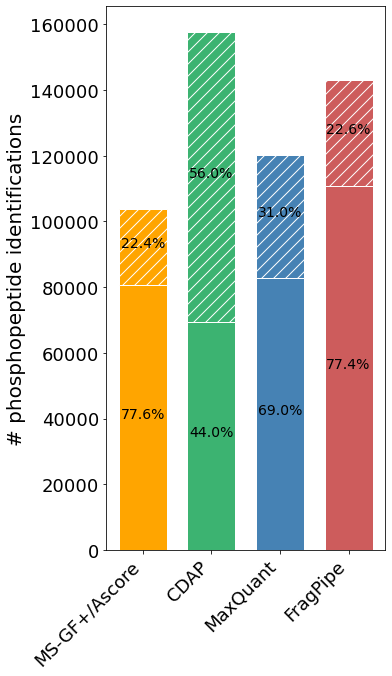

In [15]:
#Figure2c
# Values of each group
df=pd.read_csv('../data/table_for_figure2c/table2_10_22.csv')
bars1 = [df.iloc[5,1]-df.iloc[4,1],df.iloc[7,1]-df.iloc[6,1],
         df.iloc[1,1]-df.iloc[0,1],df.iloc[3,1]-df.iloc[2,1]]
bars2 = [df.iloc[4,1],df.iloc[6,1],
         df.iloc[0,1],df.iloc[2,1]]
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1.5,2.5,3.5,4.5]

plt.figure(1, figsize=(5,10))
names = ['MS-GF+/Ascore','CDAP','MaxQuant','FragPipe']
barWidth = 0.7
plt.bar(r, bars2, color=['orange','mediumseagreen','steelblue','indianred'], edgecolor='white', width=barWidth)
plt.bar(r, bars1, bottom=bars2, color=['orange','mediumseagreen','steelblue','indianred'],hatch='//', edgecolor='white', width=barWidth)
plt.xticks(r, names,size=18,rotation=45,ha='right')
plt.yticks(size=18)
plt.ylabel('# phosphopeptide identifications',size=20)
c=['black','black','black','black']
for i in range(0,4):
    value=round(bars1[i]/(bars1[i]+bars2[i])*100,1)
    plt.annotate(str(value)+'%',(r[i],bars1[i]/2+bars2[i]),horizontalalignment='center',size=14,color=c[i])
for i in range(0,4):
    value=round(bars2[i]/(bars1[i]+bars2[i])*100,1)
    plt.annotate(str(value)+'%',(r[i],bars2[i]/2),horizontalalignment='center',
                 size=14,color=c[i])
plt.savefig('../plot/Figure2c.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
plt.show()

In [16]:
#PSMs from each pipeline
#exp+scan+phosphopep
maxquant_zipped=list(zip(df_maxquant_T.index.tolist(),df_maxquant_T['scan'].tolist(),df_maxquant_T['phosphopep'].tolist()))
CDAP_zipped=list(zip(CDAP.exp.tolist(),CDAP.scan.tolist(),CDAP.phosphopep.tolist()))
Michi_zipped_2=list(zip(Michi_2.index.tolist(),Michi_2.scan.tolist(),Michi_2.phosphopep.tolist()))
PNNL_zipped = list(zip(PNNL.exp.tolist(),PNNL.scan.tolist(),PNNL.phosphopep.tolist()))

In [17]:
#Num
print(len(set(maxquant_zipped)))
print(len(set(CDAP_zipped)))
print(len(set(Michi_zipped_2)))
print(len(set(PNNL_zipped)))

35052
18629
46949
29035


In [ ]:
#Supplementary Figure2a
#For the same spectra, RTs extracted from each pipeline are the same.

In [30]:
rt_maxquant=[]
rt_michi=[]
rt_pnnl=[]
rt_cdap=[]
overlap2=set(maxquant_zipped).intersection(set(CDAP_zipped))
overlap2=overlap2.intersection(set(Michi_zipped_2))
overlap2=overlap2.intersection(set(PNNL_zipped))
for i in overlap2:
    data=df_maxquant_T[df_maxquant_T.index==i[0]]
    data=data[data.scan==i[1]]
    rt_maxquant.append(data['retention time'].tolist()[0])
    data=Michi_2[Michi_2.index==i[0]]
    data=data[data.scan==i[1]]
    rt_michi.append(data['retention time'].tolist()[0])
    data=CDAP[CDAP.index==i[0]]
    data=data[data.scan==i[1]]
    rt_cdap.append(data['retention time'].tolist()[0])
    data=PNNL[PNNL.index==i[0]]
    if i[1] in data.scan.tolist():
        data=data[data.scan==i[1]]
        if len(data)>0:
            rt_pnnl.append(data['retention time'].tolist()[0])
        else:
            rt_pnnl.append(0)
    else:
        rt_pnnl.append(0)

In [34]:
rt_michi=[i/60 for i in rt_michi]

/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarn

<Figure size 720x720 with 0 Axes>

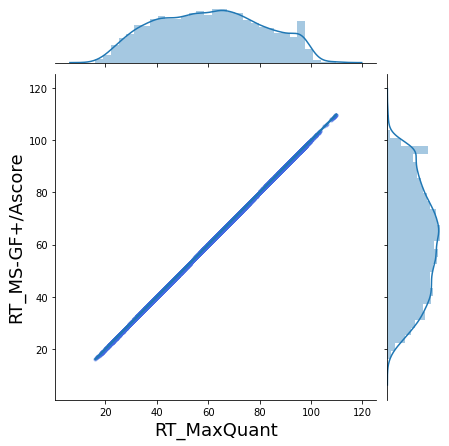

In [40]:
plt.figure(1, figsize=(10,10))
g = sns.JointGrid(x=rt_maxquant, y=rt_pnnl,space=0.2)
g = g.plot_joint(sns.regplot,fit_reg=True, scatter_kws={"color":"royalblue","alpha":0.4,"s":10})
g.set_axis_labels('RT_MaxQuant', 'RT_MS-GF+/Ascore', fontsize=18)
g = g.plot_marginals(sns.distplot, kde=True)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.savefig('../plot/Sup_Figure2a_maxquant_MSGFAscore.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

In [ ]:
#Pipeline-specific PSMs
#only maxquant
maxquant_only=[]
for i in maxquant_zipped:
    if (i not in PNNL_zipped) & (i not in Michi_zipped_2)& (i not in CDAP_zipped):
        maxquant_only.append(i)
#only FragPipe
Michi_only_2=[]
for i in Michi_zipped_2:
    if (i not in PNNL_zipped) & (i not in maxquant_zipped)& (i not in CDAP_zipped):
        Michi_only_2.append(i)
        
#only MS-GF+/Ascore
PNNL_only=[]
for i in PNNL_zipped:
    if (i not in Michi_zipped_2) & (i not in maxquant_zipped)& (i not in CDAP_zipped):
        PNNL_only.append(i)
#only CDAP
CDAP_only=[]
for i in CDAP_zipped:
    if (i not in Michi_zipped_2) & (i not in maxquant_zipped)& (i not in PNNL_zipped):
        CDAP_only.append(i)

In [ ]:
#AutoRT train & test data construction
#No sequence overlap
overlap=set(maxquant_zipped).intersection(set(CDAP_zipped))
overlap=overlap.intersection(set(Michi_zipped_2))
rt_autoRT=[]
phosphopep_autoRT=[]
idx_autoRT=[]
for i in range(len(df_maxquant_T)):
    if [(df_maxquant_T.index[i],df_maxquant_T['scan'].iloc[i],
         df_maxquant_T.phosphopep.iloc[i])][0] in list(overlap):
        rt_autoRT.append(df_maxquant_T['retention time'].iloc[i])
        phosphopep_autoRT.append(df_maxquant_T['phosphopep'].iloc[i])
        idx_autoRT.append(i)
seq_upper=[]
for i in phosphopep_autoRT:
    seq=i.replace('m','M')
    seq=seq.replace('s','S')
    seq=seq.replace('t','T')
    seq=seq.replace('y','Y')
    seq_upper.append(seq)
# seq_upper_train=[]
# seq_upper_validate=[]
# rs = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
# for train_index, test_index in rs.split(list(set(seq_upper))):
#     seq_upper_train.append(train_index)
#     seq_upper_validate.append(test_index)
# def Average(lst): 
#     return sum(lst) / len(lst) 
# q=0
# for index in seq_upper_train:
#     q=q+1
#     sequence=[list(set(seq_upper))[i] for i in index]
#     rt_full=[]
#     phospep_full=[]
#     for i in set(sequence):
#         indices = [n for n, x in enumerate(seq_upper) if x == i]
#         if len(indices)==1:
#             rt_full.append(rt_autoRT[indices[0]])
#             p=phosphopep_autoRT[indices[0]].replace('m','1')
#             p=p.replace('s','2')
#             p=p.replace('t','3')
#             p=p.replace('y','4')
#             phospep_full.append(p)
#         if len(indices)>1:
#             phos=[]
#             rt=[]
#             for idx in indices:
#                 phos.append(phosphopep_autoRT[idx])
#                 rt.append(rt_autoRT[idx])
#             for j in set(phos):
#                 indice = [n for n, x in enumerate(phos) if x == j]
#                 if len(indice)==1:
#                     rt_full.append(rt[indice[0]])
#                     p=j.replace('m','1')
#                     p=p.replace('s','2')
#                     p=p.replace('t','3')
#                     p=p.replace('y','4')
#                     phospep_full.append(p)
#                 if len(indice)>1:
#                     if max([rt[y] for y in indice])-min([rt[y] for y in indice])<=3:
#                         rt_full.append(Average([rt[y] for y in indice]))
#                         p=j.replace('m','1')
#                         p=p.replace('s','2')
#                         p=p.replace('t','3')
#                         p=p.replace('y','4')
#                         phospep_full.append(p)
# #     outputStr = ''
# #     for z in range(len(phospep_full)): 
# #         outputStr += str(phospep_full[z]) + "\t" + str(rt_full[z]) +'\n'
# #     file=''.join(['../data/AutoRT_data/UCEC/MaxQuant_CDAP_Michi_2_noseqoverlap_train_',str(q),'.tsv'])
# #     with open(file, "w") as outputter:
# #         outputter.write('x'+"\t"+'y'+'\n')
# #         outputter.write(outputStr)
# q=0
# for index in seq_upper_validate:
#     q=q+1
#     sequence=[list(set(seq_upper))[i] for i in index]
#     rt_full=[]
#     phospep_full=[]
#     for i in set(sequence):
#         indices = [n for n, x in enumerate(seq_upper) if x == i]
#         if len(indices)==1:
#             rt_full.append(rt_autoRT[indices[0]])
#             p=phosphopep_autoRT[indices[0]].replace('m','1')
#             p=p.replace('s','2')
#             p=p.replace('t','3')
#             p=p.replace('y','4')
#             phospep_full.append(p)
#         if len(indices)>1:
#             phos=[]
#             rt=[]
#             for idx in indices:
#                 phos.append(phosphopep_autoRT[idx])
#                 rt.append(rt_autoRT[idx])
#             for j in set(phos):
#                 indice = [n for n, x in enumerate(phos) if x == j]
#                 if len(indice)==1:
#                     rt_full.append(rt[indice[0]])
#                     p=j.replace('m','1')
#                     p=p.replace('s','2')
#                     p=p.replace('t','3')
#                     p=p.replace('y','4')
#                     phospep_full.append(p)
#                 if len(indice)>1:
#                     if max([rt[y] for y in indice])-min([rt[y] for y in indice])<=3:
#                         rt_full.append(Average([rt[y] for y in indice]))
#                         p=j.replace('m','1')
#                         p=p.replace('s','2')
#                         p=p.replace('t','3')
#                         p=p.replace('y','4')
#                         phospep_full.append(p)
# #     outputStr = ''
# #     for z in range(len(phospep_full)): 
# #         outputStr += str(phospep_full[z]) + "\t" + str(rt_full[z]) +'\n'
# #     file=''.join(['../data/AutoRT_data/UCEC/MaxQuant_CDAP_Michi_2_noseqoverlap_validation_',str(q),'.tsv'])
# #     with open(file, "w") as outputter:
# #         outputter.write('x'+"\t"+'y'+'\n')
# #         outputter.write(outputStr)

In [ ]:
#MaxQuant prediction, peptide < 48 AA, unique
rt_maxquant_only=[]
phosphopep_maxquant_only=[]
idx_maxquant_only=[]
for i in range(len(df_maxquant_T)):
    if [(df_maxquant_T.index[i],df_maxquant_T['scan'].iloc[i],
        df_maxquant_T['phosphopep'].iloc[i])][0] in maxquant_only:
        seq=df_maxquant_T['phosphopep'].iloc[i].replace('m','M')
        seq=seq.replace('s','S')
        seq=seq.replace('t','T')
        seq=seq.replace('y','Y')
        if seq in seq_upper:
            continue
        if len(list(df_maxquant_T['phosphopep'].iloc[i]))<=48:
            rt_maxquant_only.append(df_maxquant_T['retention time'].iloc[i])
            phosphopep_maxquant_only.append(df_maxquant_T['phosphopep'].iloc[i])
            idx_maxquant_only.append(i)
#maxquant_Autort=df_maxquant_T.iloc[idx_maxquant_only]
#maxquant_Autort.to_pickle('../data/AutoRT_data/UCEC/prediction/maxquant_Autort.pkl')
cp_maxquant_only1=list(zip(phosphopep_maxquant_only,rt_maxquant_only))
cp_maxquant_only1=list(set(cp_maxquant_only1))
phosphopep_MaxQuant=[]
rt_MaxQuant=[]
for i in range(len(cp_maxquant_only1)):
    pep=cp_maxquant_only1[i][0].replace('m','1')
    pep=pep.replace('s','2')
    pep=pep.replace('t','3')
    pep=pep.replace('y','4')
    phosphopep_MaxQuant.append(pep)
    rt_MaxQuant.append(cp_maxquant_only1[i][1])
#outputStr = ''
#for z in range(len(phosphopep_MaxQuant)): 
#    outputStr += str(phosphopep_MaxQuant[z]) + "\t" + str(rt_MaxQuant[z]) +'\n'
#file=''.join(['../data/AutoRT_data/UCEC/prediction/MaxQuant_prediction.tsv'])
#with open(file, "w") as outputter:
#    outputter.write('x'+"\t"+'y'+'\n')
#    outputter.write(outputStr)

In [ ]:
#CDAP prediction, peptide < 48 AA, unique
rt_CDAP_only=[]
phosphopep_CDAP_only=[]
idx_CDAP_only=[]
for i in range(len(CDAP)):
    if [(CDAP.exp.iloc[i],int(CDAP.scan.iloc[i]),CDAP.phosphopep.iloc[i])][0] in CDAP_only:
        seq=CDAP['phosphopep'].iloc[i].replace('m','M')
        seq=seq.replace('s','S')
        seq=seq.replace('t','T')
        seq=seq.replace('y','Y')
        if seq in seq_upper:
            continue
        if len(list(CDAP['phosphopep'].iloc[i]))<=48:
            rt_CDAP_only.append(CDAP['retention time'].iloc[i])
            phosphopep_CDAP_only.append(CDAP['phosphopep'].iloc[i])
            idx_CDAP_only.append(i)
#CDAP_Autort=CDAP.iloc[idx_CDAP_only]
#CDAP_Autort.to_pickle('../data/AutoRT_data/UCEC/prediction/CDAP_Autort.pkl')
phosphopep_CDAP=[]
for i in phosphopep_CDAP_only:
    pep=i.replace('m','1')
    pep=pep.replace('s','2')
    pep=pep.replace('t','3')
    pep=pep.replace('y','4')
    phosphopep_CDAP.append(pep)
#outputStr = ''
#for z in range(len(phosphopep_CDAP)): 
#    outputStr += str(phosphopep_CDAP[z]) + "\t" + str(rt_CDAP_only[z]) +'\n'
#file=''.join(['AutoRT_data/UCEC/prediction/CDAP_prediction.tsv'])
#with open(file, "w") as outputter:
#    outputter.write('x'+"\t"+'y'+'\n')
#    outputter.write(outputStr)

In [ ]:
#MS-GF+/Ascore prediction, peptide < 48 AA, unique
rt_PNNL_only=[]
phosphopep_PNNL_only=[]
idx_PNNL_only=[]
for i in range(len(PNNL)): 
    if [(PNNL.index[i],int(PNNL.scan.iloc[i]),PNNL.phosphopep.iloc[i])][0] in PNNL_only:
        seq=PNNL['phosphopep'].iloc[i].replace('m','M')
        seq=seq.replace('s','S')
        seq=seq.replace('t','T')
        seq=seq.replace('y','Y')
        if seq in seq_upper:
            continue
        if len(list(PNNL['phosphopep'].iloc[i]))<=48:
            rt_PNNL_only.append(PNNL['retention time'].iloc[i])
            phosphopep_PNNL_only.append(PNNL['phosphopep'].iloc[i])
            idx_PNNL_only.append(i)
#PNNL_Autort=PNNL.iloc[idx_PNNL_only]
#PNNL_Autort.to_pickle('../data/AutoRT_data/UCEC/prediction/PNNL_Autort.pkl')
cp_PNNL_only1=list(zip(phosphopep_PNNL_only,rt_PNNL_only))
cp_PNNL_only1=list(set(cp_PNNL_only1))
phosphopep_PNNL=[]
rt_PNNL=[]
for i in range(len(cp_PNNL_only1)):
    pep=cp_PNNL_only1[i][0].replace('m','1')
    pep=pep.replace('s','2')
    pep=pep.replace('t','3')
    pep=pep.replace('y','4')
    phosphopep_PNNL.append(pep)
    rt_PNNL.append(cp_PNNL_only1[i][1])
#outputStr = ''
#for z in range(len(phosphopep_PNNL)): 
#    outputStr += str(phosphopep_PNNL[z]) + "\t" + str(rt_PNNL[z]) +'\n'
#file=''.join(['../data/AutoRT_data/UCEC/prediction/PNNL_prediction.tsv'])
#with open(file, "w") as outputter:
#    outputter.write('x'+"\t"+'y'+'\n')
#    outputter.write(outputStr)

In [ ]:
#FragPipe prediction, peptide < 48 AA, unique
rt_michi_only=[]
phosphopep_michi_only=[]
idx_michi_only=[]
for i in range(len(Michi_2)):
    if [(Michi_2.index[i],int(Michi_2.scan.iloc[i]),Michi_2.phosphopep.iloc[i])][0] in Michi_only_2:
        seq=Michi_2['phosphopep'].iloc[i].replace('m','M')
        seq=seq.replace('s','S')
        seq=seq.replace('t','T')
        seq=seq.replace('y','Y')
        if seq in seq_upper:
            continue
        if len(list(Michi_2['phosphopep'].iloc[i]))<=48:
            rt_michi_only.append(Michi_2['retention time'].iloc[i]/60)
            phosphopep_michi_only.append(Michi_2['phosphopep'].iloc[i])
            idx_michi_only.append(i)
#Michi_Autort=Michi_2.iloc[idx_michi_only]
#Michi_Autort.to_pickle('../data/AutoRT_data/UCEC/prediction/Michi_Autort.pkl')
cp_michi_only1=list(zip(phosphopep_michi_only,rt_michi_only))
cp_michi_only1=list(set(cp_michi_only1))
phosphopep_michi=[]
rt_michi=[]
for i in range(len(cp_michi_only1)):
    pep=cp_michi_only1[i][0].replace('m','1')
    pep=pep.replace('s','2')
    pep=pep.replace('t','3')
    pep=pep.replace('y','4')
    phosphopep_michi.append(pep)
    rt_michi.append(cp_michi_only1[i][1])
#outputStr = ''
#for z in range(len(phosphopep_michi)): 
#    outputStr += str(phosphopep_michi[z]) + "\t" + str(rt_michi[z]) +'\n'
#file=''.join(['../data/AutoRT_data/UCEC/prediction/Michi_prediction_2.tsv'])
#with open(file, "w") as outputter:
#    outputter.write('x'+"\t"+'y'+'\n')
#    outputter.write(outputStr)

In [ ]:
#Overlap_Autort=df_maxquant_T.iloc[idx_autoRT]
#Overlap_Autort.to_pickle('../data/AutoRT_data/UCEC/prediction/overlap_Autort.pkl')

In [44]:
#Figure 4a
#Load dataframe used for AutoRT prediction
#phosphopeptides
maxquant_Autort=pd.read_pickle('../data/AutoRT_data/UCEC/prediction/maxquant_Autort.pkl')
Michi_Autort=pd.read_pickle('../data/AutoRT_data/UCEC/prediction/Michi_Autort.pkl')
PNNL_Autort=pd.read_pickle('../data/AutoRT_data/UCEC/prediction/PNNL_Autort.pkl')
CDAP_Autort=pd.read_pickle('../data/AutoRT_data/UCEC/prediction/CDAP_Autort.pkl')
overlap_Autort=pd.read_pickle('../data/AutoRT_data/UCEC/prediction/overlap_Autort.pkl')
michi_2=pd.read_table('../data/AutoRT_data/UCEC/prediction/Michi_prediction_2.tsv')
phosphopep_michi_2=list(michi_2.x)
maxquant=pd.read_table('../data/AutoRT_data/UCEC/prediction/MaxQuant_prediction.tsv')
phosphopep_maxquant=list(maxquant.x)
train1 = pd.read_table('../data/AutoRT_data/UCEC/MaxQuant_CDAP_Michi_2_noseqoverlap_train_1.tsv')
test1=pd.read_table('../data/AutoRT_data/UCEC/MaxQuant_CDAP_Michi_2_noseqoverlap_validation_1.tsv')
phosphopep_overlap=list(train1.x)+list(test1.x)
pnnl=pd.read_table('../data/AutoRT_data/UCEC/prediction/PNNL_prediction.tsv')
phosphopep_pnnl=list(pnnl.x)
cdap=pd.read_table('../data/AutoRT_data/UCEC/prediction/CDAP_prediction.tsv')
phosphopep_cdap=list(cdap.x)
#PSM
#exp+scan+phosphopep
maxquant_zipped_autort=list(zip(maxquant_Autort.index.tolist(),maxquant_Autort['scan'].tolist(),maxquant_Autort['phosphopep'].tolist()))
CDAP_zipped_autort=list(zip(CDAP_Autort.exp.tolist(),CDAP_Autort.scan.tolist(),CDAP_Autort.phosphopep.tolist()))
Michi_zipped_2_autort=list(zip(Michi_Autort.index.tolist(),Michi_Autort.scan.tolist(),Michi_Autort.phosphopep.tolist()))
PNNL_zipped_autort = list(zip(PNNL_Autort.exp.tolist(),PNNL_Autort.scan.tolist(),PNNL_Autort.phosphopep.tolist()))
overlap_zipped_autort=list(zip(overlap_Autort.index.tolist(),overlap_Autort.scan.tolist(),overlap_Autort.phosphopep.tolist()))

In [46]:
#localized all
Autort_all_phospep=[len(set(overlap_Autort.phosphopep)),len(set(df_maxquant_T.phosphopep)),
                    len(set(Michi_2.phosphopep)),len(set(PNNL.phosphopep)),len(set(CDAP.phosphopep))]
Autort_all_psm=[len(set(overlap_zipped_autort)),(len(set(maxquant_zipped))),(len(set(Michi_zipped_2))),(len(set(PNNL_zipped))),len(set(CDAP_zipped))]
#Unique & <48aa
Autort_pre_phospep=[len(set(test1.x)),len(set(phosphopep_maxquant)), len(set(phosphopep_michi_2)), len(set(phosphopep_pnnl)), len(set(phosphopep_cdap))]
Autort_pre_psm=[int(len(set(overlap_zipped_autort))/10),(len(set(maxquant_zipped_autort))),(len(set(Michi_zipped_2_autort))),(len(set(PNNL_zipped_autort))),len(set(CDAP_zipped_autort))]

In [47]:
d={'all_phospep':Autort_all_phospep,'Autort_predict_phospep':Autort_pre_phospep,
   'all_psm':Autort_all_psm,'Autort_predict_psm':Autort_pre_psm}
df=pd.DataFrame(d)
df.index=['overlap','maxquant','michi','pnnl','cdap']
# df.to_csv('../data/AutoRT_data/UCEC/prediction/figure4_table.csv')

<ipython-input-49-0a82f6ab4abc>:27: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure4a.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


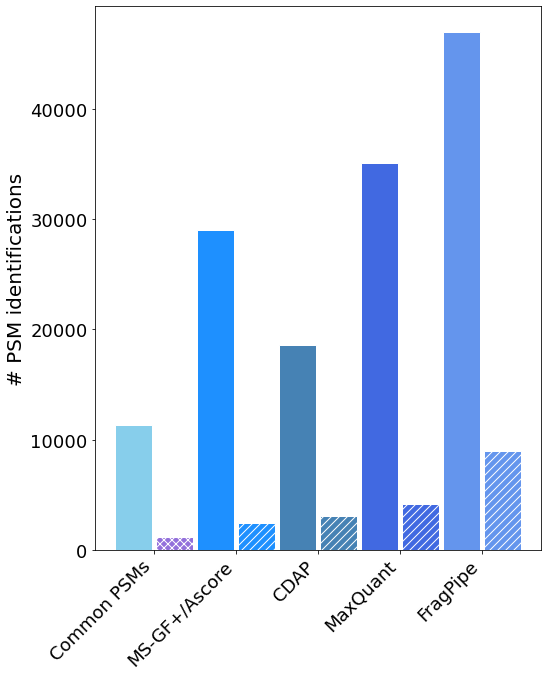

In [49]:
# Values of each group
#df=pd.read_table('../dataAutoRT_data/UCEC/prediction/figure4_table.csv')
lst=df.all_psm.tolist()
bars1 = [lst[0],lst[3],lst[4],lst[1],lst[2]]
lst=df.Autort_predict_psm.tolist()
bars2 = [lst[0],lst[3],lst[4],lst[1],lst[2]]
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1.5,3.5,5.5,7.5,9.5]
r1 = [1,3,5,7,9]
r2 = [4,6,8,10]

plt.figure(1, figsize=(8,10))

# Names of group and bar width
names = ['Common PSMs','MS-GF+/Ascore','CDAP','MaxQuant','FragPipe']
barWidth = 0.9
plt.bar(r1, bars1, color=['skyblue','dodgerblue','steelblue','royalblue','cornflowerblue'], edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(2, bars2[0], color=['mediumpurple'],hatch='xxx', edgecolor='white', width=barWidth)
plt.bar(r2, bars2[1:], color=['dodgerblue','steelblue','royalblue','cornflowerblue'],hatch='///', edgecolor='white', width=barWidth)
plt.xticks(r, names,size=18,rotation=45,ha='right')
plt.yticks(size=18)
plt.ylabel('# PSM identifications',size=20)
plt.savefig('../plot/Figure4a.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()


In [50]:
#Supplementary Figure1
#Jaccard
def intersection(s1, s2) : 
  
    # Find the intersection of the two sets  
    intersect = s1 & s2 ; 
  
    return intersect;  
  
  
# Function to return the Jaccard index of two sets  
def jaccard_index(s1, s2) : 
      
    # Sizes of both the sets  
    size_s1 = len(s1);  
    size_s2 = len(s2);  
  
    # Get the intersection set
    intersect=[]
    for i in s1:
        if i in s2:
            intersect.append(i)
  
    # Size of the intersection set  
    size_in = len(intersect);  
  
    # Calculate the Jaccard index  
    # using the formula  
    jaccard_in = size_in  / (size_s1 + size_s2 - size_in);  
  
    # Return the Jaccard index  
    return jaccard_in;
def jaccard_distance(jaccardIndex)  : 
  
    # Calculate the Jaccard distance  
    # using the formula  
    jaccard_dist = 1 - jaccardIndex;  
  
    # Return the Jaccard distance  
    return jaccard_dist;  
def removekey(d, key):
    r = dict(d)
    del r[key]
    return r

<ipython-input-51-bbec9c1a4db8>:19: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Sup_Figure1_pep_JI.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


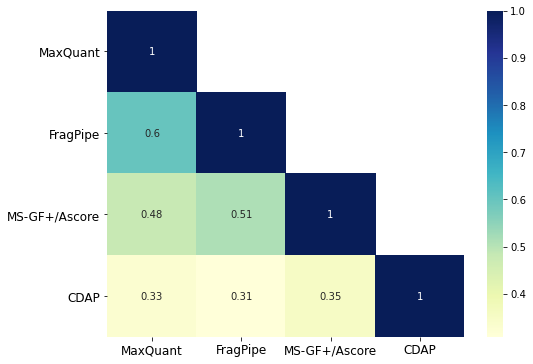

In [51]:
PSMs = {"MaxQuant":set(df_maxquant_T.phosphopep),
        "FragPipe":set(Michi_2.phosphopep),
        "MS-GF+/Ascore":set(PNNL.phosphopep),
        "CDAP":set(CDAP.phosphopep)}
index=[]
for i in PSMs:
    JI=[]
    for j in PSMs:
        JI.append(jaccard_index(PSMs[i],PSMs[j]))
    index.append(JI)
matrix = np.triu(index,1)
plt.figure(1, figsize=(8,6))
sns.heatmap(index, annot=True, mask=matrix,cmap="YlGnBu")
group=['MaxQuant','FragPipe','MS-GF+/Ascore','CDAP']
r1=[0.5,1.5,2.5,3.5]
r2=[0.5,1.5,2.5,3.5]
plt.yticks(r2,group,size=12,rotation=0)
plt.xticks(r1,group,size=12)
plt.savefig('../plot/Sup_Figure1_pep_JI.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')

<ipython-input-52-96b2f159bf48>:19: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Sup_Figure1_psm_JI.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


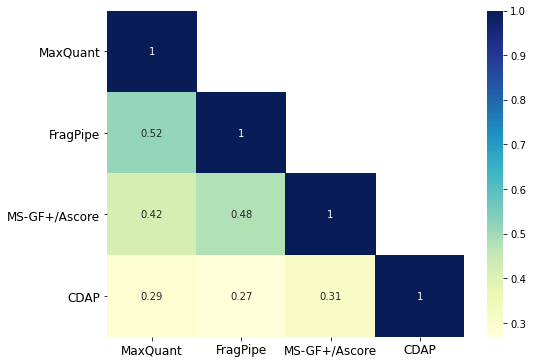

In [52]:
PSMs = {"MaxQuant":set(maxquant_zipped),
        "FragPipe":set(Michi_zipped_2),
        "MS-GF+/Ascore":set(PNNL_zipped),
        "CDAP":set(CDAP_zipped)}
index=[]
for i in PSMs:
    JI=[]
    for j in PSMs:
        JI.append(jaccard_index(PSMs[i],PSMs[j]))
    index.append(JI)
matrix = np.triu(index,1)
plt.figure(1, figsize=(8,6))
sns.heatmap(index, annot=True, mask=matrix,cmap="YlGnBu")
group=['MaxQuant','FragPipe','MS-GF+/Ascore','CDAP']
r1=[0.5,1.5,2.5,3.5]
r2=[0.5,1.5,2.5,3.5]
plt.yticks(r2,group,size=12,rotation=0)
plt.xticks(r1,group,size=12)
plt.savefig('../plot/Sup_Figure1_psm_JI.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')

In [ ]:
#PSMs identified by different numbers of pipelines

In [19]:
#Avoid overlapping with training data
train=pd.read_table('../data/AutoRT_data/UCEC/MaxQuant_CDAP_Michi_2_noseqoverlap_train_1.tsv')
pep=train.x.tolist()
seq_upper_train=[]
for i in pep:
    seq=i.replace('1','M')
    seq=seq.replace('2','S')
    seq=seq.replace('3','T')
    seq=seq.replace('4','Y')
    seq_upper_train.append(seq)
seq_upper_train=list(set(seq_upper_train))

In [20]:
#Group4
CDAP_PNNL_MQ_Frag=set(CDAP_zipped).intersection(PNNL_zipped)
CDAP_PNNL_MQ_Frag=CDAP_PNNL_MQ_Frag.intersection(maxquant_zipped)
CDAP_PNNL_MQ_Frag=CDAP_PNNL_MQ_Frag.intersection(Michi_zipped_2)
#Group4
rt_group2=[]
phosphopep_group2=[]
idx_group2=[]
data_tmp=list(CDAP_PNNL_MQ_Frag)
for i in range(len(data_tmp)):
    seq=data_tmp[i][2].replace('m','M')
    seq=seq.replace('s','S')
    seq=seq.replace('t','T')
    seq=seq.replace('y','Y')
    if seq in seq_upper_train:
        continue
    if len(seq)>48:
        continue
    file_tmp=df_maxquant_T
    file_tmp=file_tmp.loc[data_tmp[i][0]]
    file_tmp=file_tmp[file_tmp['scan']==data_tmp[i][1]]
    rt_group2.append(file_tmp['retention time'].iloc[0])
    phosphopep_group2.append(file_tmp['phosphopep'].iloc[0])
cp_group2=list(zip(phosphopep_group2,rt_group2))
cp_group2=list(set(cp_group2))
phosphopep_2=[]
rt_2=[]
for i in range(len(cp_group2)):
    pep=cp_group2[i][0].replace('m','1')
    pep=pep.replace('s','2')
    pep=pep.replace('t','3')
    pep=pep.replace('y','4')
    phosphopep_2.append(pep)
    rt_2.append(cp_group2[i][1])
#outputStr = ''
#for z in range(len(phosphopep_2)): 
#    outputStr += str(phosphopep_2[z]) + "\t" + str(rt_2[z]) +'\n'
#file_name=''.join(['../data/AutoRT_data/UCEC/7_13_2021/CDAP_PNNL_MQ_Frag_prediction.tsv'])
#with open(file_name, "w") as outputter:
#    outputter.write('x'+"\t"+'y'+'\n')
#    outputter.write(outputStr)

In [21]:
#Group3
PNNL_MQ_Frag=set(PNNL_zipped).intersection(maxquant_zipped)
PNNL_MQ_Frag=PNNL_MQ_Frag.intersection(Michi_zipped_2)
CDAP_MQ_Frag=set(CDAP_zipped).intersection(maxquant_zipped)
CDAP_MQ_Frag=CDAP_MQ_Frag.intersection(Michi_zipped_2)
CDAP_PNNL_Frag=set(CDAP_zipped).intersection(PNNL_zipped)
CDAP_PNNL_Frag=CDAP_PNNL_Frag.intersection(Michi_zipped_2)
CDAP_PNNL_MQ=set(CDAP_zipped).intersection(PNNL_zipped)
CDAP_PNNL_MQ=CDAP_PNNL_MQ.intersection(maxquant_zipped)
PNNL_MQ_Frag_group3=[]
for i in PNNL_MQ_Frag:
    if i not in CDAP_zipped:
        PNNL_MQ_Frag_group3.append(i)
CDAP_MQ_Frag_group3=[]
for i in CDAP_MQ_Frag:
    if i not in PNNL_zipped:
        CDAP_MQ_Frag_group3.append(i)
CDAP_PNNL_Frag_group3=[]
for i in CDAP_PNNL_Frag:
    if i not in maxquant_zipped:
        CDAP_PNNL_Frag_group3.append(i)
CDAP_PNNL_MQ_group3=[]
for i in CDAP_PNNL_MQ:
    if i not in Michi_zipped_2:
        CDAP_PNNL_MQ_group3.append(i)

In [22]:
#Group3
data=[PNNL_MQ_Frag_group3,CDAP_MQ_Frag_group3,CDAP_PNNL_MQ_group3]
name=['PNNL_MQ_Frag','CDAP_MQ_Frag','CDAP_PNNL_MQ']
for k in range(len(data)):
    rt_group2=[]
    phosphopep_group2=[]
    idx_group2=[]
    data_tmp=data[k]
    for i in range(len(data_tmp)):
        seq=data_tmp[i][2].replace('m','M')
        seq=seq.replace('s','S')
        seq=seq.replace('t','T')
        seq=seq.replace('y','Y')
        if seq in seq_upper_train:
            continue
        if len(seq)>48:
            continue
        file_tmp=df_maxquant_T
        file_tmp=file_tmp.loc[data_tmp[i][0]]
        file_tmp=file_tmp[file_tmp['scan']==data_tmp[i][1]]
        rt_group2.append(file_tmp['retention time'].iloc[0])
        phosphopep_group2.append(file_tmp['phosphopep'].iloc[0])
    cp_group2=list(zip(phosphopep_group2,rt_group2))
    cp_group2=list(set(cp_group2))
    phosphopep_2=[]
    rt_2=[]
    for i in range(len(cp_group2)):
        pep=cp_group2[i][0].replace('m','1')
        pep=pep.replace('s','2')
        pep=pep.replace('t','3')
        pep=pep.replace('y','4')
        phosphopep_2.append(pep)
        rt_2.append(cp_group2[i][1])
    #outputStr = ''
    #for z in range(len(phosphopep_2)): 
    #    outputStr += str(phosphopep_2[z]) + "\t" + str(rt_2[z]) +'\n'
    #file_name=''.join(['../data/AutoRT_data/UCEC/7_13_2021/',name[k],'_prediction.tsv'])
    #with open(file_name, "w") as outputter:
    #    outputter.write('x'+"\t"+'y'+'\n')
    #    outputter.write(outputStr)

In [23]:
#Group3
rt_group2=[]
phosphopep_group2=[]
idx_group2=[]
data_tmp=CDAP_PNNL_Frag_group3
for i in range(len(data_tmp)):
    seq=data_tmp[i][2].replace('m','M')
    seq=seq.replace('s','S')
    seq=seq.replace('t','T')
    seq=seq.replace('y','Y')
    if seq in seq_upper_train:
        continue
    if len(seq)>48:
        continue
    file_tmp=CDAP
    file_tmp=file_tmp.loc[data_tmp[i][0]]
    file_tmp=file_tmp[file_tmp['scan']==data_tmp[i][1]]
    rt_group2.append(file_tmp['retention time'].iloc[0])
    phosphopep_group2.append(file_tmp['phosphopep'].iloc[0])
cp_group2=list(zip(phosphopep_group2,rt_group2))
cp_group2=list(set(cp_group2))
phosphopep_2=[]
rt_2=[]
for i in range(len(cp_group2)):
    pep=cp_group2[i][0].replace('m','1')
    pep=pep.replace('s','2')
    pep=pep.replace('t','3')
    pep=pep.replace('y','4')
    phosphopep_2.append(pep)
    rt_2.append(cp_group2[i][1])
#outputStr = ''
#for z in range(len(phosphopep_2)): 
#    outputStr += str(phosphopep_2[z]) + "\t" + str(rt_2[z]) +'\n'
#file_name=''.join(['AutoRT_data/UCEC/7_13_2021/CDAP_PNNL_Frag_prediction.tsv'])
#with open(file_name, "w") as outputter:
#    outputter.write('x'+"\t"+'y'+'\n')
#    outputter.write(outputStr)

In [24]:
#Group2
MQ_Frag=set(maxquant_zipped).intersection(Michi_zipped_2)
PNNL_Frag=set(PNNL_zipped).intersection(Michi_zipped_2)
CDAP_Frag=set(CDAP_zipped).intersection(Michi_zipped_2)
PNNL_MQ=set(PNNL_zipped).intersection(maxquant_zipped)
CDAP_MQ=set(CDAP_zipped).intersection(maxquant_zipped)
CDAP_PNNL=set(CDAP_zipped).intersection(PNNL_zipped)
MQ_Frag_group2=[]
for i in MQ_Frag:
    if i not in CDAP_zipped:
        if i not in PNNL_zipped:
            MQ_Frag_group2.append(i)
PNNL_Frag_group2=[]
for i in PNNL_Frag:
    if i not in CDAP_zipped:
        if i not in maxquant_zipped:
            PNNL_Frag_group2.append(i)
CDAP_Frag_group2=[]
for i in CDAP_Frag:
    if i not in PNNL_zipped:
        if i not in maxquant_zipped:
            CDAP_Frag_group2.append(i)
PNNL_MQ_group2=[]
for i in PNNL_MQ:
    if i not in CDAP_zipped:
        if i not in Michi_zipped_2:
            PNNL_MQ_group2.append(i)
CDAP_MQ_group2=[]
for i in CDAP_MQ:
    if i not in PNNL_zipped:
        if i not in Michi_zipped_2:
            CDAP_MQ_group2.append(i)
CDAP_PNNL_group2=[]
for i in CDAP_PNNL:
    if i not in maxquant_zipped:
        if i not in Michi_zipped_2:
            CDAP_PNNL_group2.append(i)

In [25]:
data=[MQ_Frag_group2, PNNL_Frag_group2, CDAP_Frag_group2, PNNL_MQ_group2, 
      CDAP_MQ_group2, CDAP_PNNL_group2]
name=['MQ_Frag', 'PNNL_Frag', 'CDAP_Frag', 'PNNL_MQ', 
      'CDAP_MQ', 'CDAP_PNNL']
#Group2 prediction, peptide < 48 AA, unique
for k in range(len(data)):  
    rt_group2=[]
    phosphopep_group2=[]
    idx_group2=[]
    data_tmp=data[k]
    for i in range(len(data_tmp)):
        seq=data_tmp[i][2].replace('m','M')
        seq=seq.replace('s','S')
        seq=seq.replace('t','T')
        seq=seq.replace('y','Y')
        if seq in seq_upper_train:
            continue
        if len(seq)>48:
            continue
        if data_tmp[i] in CDAP_zipped:
            file_tmp=CDAP
            file_tmp=file_tmp.loc[data_tmp[i][0]]
            file_tmp=file_tmp[file_tmp['scan']==data_tmp[i][1]]
            rt_group2.append(file_tmp['retention time'].iloc[0])
            phosphopep_group2.append(file_tmp['phosphopep'].iloc[0])
        else:
            if data_tmp[i] in PNNL_zipped:
                file_tmp=PNNL
                file_tmp=file_tmp.loc[data_tmp[i][0]]
                file_tmp=file_tmp[file_tmp['scan']==data_tmp[i][1]]
                rt_group2.append(file_tmp['retention time'].iloc[0])
                phosphopep_group2.append(file_tmp['phosphopep'].iloc[0])
            else:
                if data_tmp[i] in maxquant_zipped:
                    file_tmp=df_maxquant_T
                    file_tmp=file_tmp.loc[data_tmp[i][0]]
                    file_tmp=file_tmp[file_tmp['scan']==data_tmp[i][1]]
                    rt_group2.append(file_tmp['retention time'].iloc[0])
                    phosphopep_group2.append(file_tmp['phosphopep'].iloc[0])
                else:
                    if data_tmp[i] in Michi_zipped_2:
                        file_tmp=Michi_2
                        file_tmp=file_tmp.loc[data_tmp[i][0]]
                        file_tmp=file_tmp[file_tmp['scan']==data_tmp[i][1]]
                        rt_group2.append(file_tmp['retention time'].iloc[0]/60)
                        phosphopep_group2.append(file_tmp['phosphopep'].iloc[0])
    cp_group2=list(zip(phosphopep_group2,rt_group2))
    cp_group2=list(set(cp_group2))
    phosphopep_2=[]
    rt_2=[]
    for i in range(len(cp_group2)):
        pep=cp_group2[i][0].replace('m','1')
        pep=pep.replace('s','2')
        pep=pep.replace('t','3')
        pep=pep.replace('y','4')
        phosphopep_2.append(pep)
        rt_2.append(cp_group2[i][1])
    #outputStr = ''
    #for z in range(len(phosphopep_2)): 
    #    outputStr += str(phosphopep_2[z]) + "\t" + str(rt_2[z]) +'\n'
    #file_name=''.join(['../data/AutoRT_data/UCEC/7_13_2021/',name[k],'_prediction.tsv'])
    #with open(file_name, "w") as outputter:
    #    outputter.write('x'+"\t"+'y'+'\n')
    #    outputter.write(outputStr)

In [ ]:
#Group1
data=[PNNL_only, CDAP_only, maxquant_only, Michi_only_2]
name=['PNNL', 'CDAP', 'MQ', 'Frag']
#Group2 prediction, peptide < 48 AA, unique
for k in range(len(data)):  
    rt_group2=[]
    phosphopep_group2=[]
    idx_group2=[]
    data_tmp=data[k]
    for i in range(len(data_tmp)):
        seq=data_tmp[i][2].replace('m','M')
        seq=seq.replace('s','S')
        seq=seq.replace('t','T')
        seq=seq.replace('y','Y')
        if seq in seq_upper_train:
            continue
        if len(seq)>48:
            continue
        if data_tmp[i] in CDAP_zipped:
            file_tmp=CDAP
            file_tmp=file_tmp.loc[data_tmp[i][0]]
            file_tmp=file_tmp[file_tmp['scan']==data_tmp[i][1]]
            rt_group2.append(file_tmp['retention time'].iloc[0])
            phosphopep_group2.append(file_tmp['phosphopep'].iloc[0])
        else:
            if data_tmp[i] in PNNL_zipped:
                file_tmp=PNNL
                file_tmp=file_tmp.loc[data_tmp[i][0]]
                file_tmp=file_tmp[file_tmp['scan']==data_tmp[i][1]]
                rt_group2.append(file_tmp['retention time'].iloc[0])
                phosphopep_group2.append(file_tmp['phosphopep'].iloc[0])
            else:
                if data_tmp[i] in maxquant_zipped:
                    file_tmp=df_maxquant_T
                    file_tmp=file_tmp.loc[data_tmp[i][0]]
                    file_tmp=file_tmp[file_tmp['scan']==data_tmp[i][1]]
                    rt_group2.append(file_tmp['retention time'].iloc[0])
                    phosphopep_group2.append(file_tmp['phosphopep'].iloc[0])
                else:
                    if data_tmp[i] in Michi_zipped_2:
                        file_tmp=Michi_2
                        file_tmp=file_tmp.loc[data_tmp[i][0]]
                        file_tmp=file_tmp[file_tmp['scan']==data_tmp[i][1]]
                        rt_group2.append(file_tmp['retention time'].iloc[0]/60)
                        phosphopep_group2.append(file_tmp['phosphopep'].iloc[0])
    cp_group2=list(zip(phosphopep_group2,rt_group2))
    cp_group2=list(set(cp_group2))
    phosphopep_2=[]
    rt_2=[]
    for i in range(len(cp_group2)):
        pep=cp_group2[i][0].replace('m','1')
        pep=pep.replace('s','2')
        pep=pep.replace('t','3')
        pep=pep.replace('y','4')
        phosphopep_2.append(pep)
        rt_2.append(cp_group2[i][1])
    #outputStr = ''
    #for z in range(len(phosphopep_2)): 
    #    outputStr += str(phosphopep_2[z]) + "\t" + str(rt_2[z]) +'\n'
    #file_name=''.join(['../data/AutoRT_data/UCEC/7_13_2021/',name[k],'_prediction.tsv'])
    #with open(file_name, "w") as outputter:
    #    outputter.write('x'+"\t"+'y'+'\n')
    #    outputter.write(outputStr)

In [54]:
#AutoRT results
AutoRT_test_rt = pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/tf_prediction_Nano_UCEC_exp01_range3_cross1/test.csv')
AutoRT_michi_rt_2 = pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/10-23/tf_prediction_Nano_UCEC_exp01_range3_cross1_michi/test.csv')
AutoRT_PNNL_rt = pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/10-23/tf_prediction_Nano_UCEC_exp01_range3_cross1_pnnl/test.csv')
AutoRT_maxquant_rt = pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/10-23/tf_prediction_Nano_UCEC_exp01_range3_cross1_maxquant/test.csv')
AutoRT_CDAP_rt = pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/10-23/tf_prediction_Nano_UCEC_exp01_range3_cross1_CDAP_2_1/test.csv')

In [68]:
#AutoRT results
AutoRT_michi_rt_2_all = pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/10-23/tf_prediction_Nano_UCEC_exp01_range3_cross1_Michi_all/test.csv')
AutoRT_PNNL_rt_all = pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/10-23/tf_prediction_Nano_UCEC_exp01_range3_cross1_PNNL_all/test.csv')
AutoRT_maxquant_rt_all = pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/10-23/tf_prediction_Nano_UCEC_exp01_range3_cross1_MaxQuant_all/test.csv')
AutoRT_CDAP_rt_all = pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/10-23/tf_prediction_Nano_UCEC_exp01_range3_cross1_CDAP_all_2_1/test.csv')

In [55]:
#AutoRT results
AutoRT_CDAP_Frag=pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/7_13_2021/tf_CDAP_Frag_group2/test.csv')
AutoRT_CDAP_MQ_Frag=pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/7_13_2021/tf_CDAP_MQ_Frag_group3/test.csv')
AutoRT_CDAP_MQ=pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/7_13_2021/tf_CDAP_MQ_group2/test.csv')
AutoRT_CDAP_PNNL_Frag=pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/7_13_2021/tf_CDAP_PNNL_Frag_group3/test.csv')
AutoRT_CDAP_PNNL=pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/7_13_2021/tf_CDAP_PNNL_group2/test.csv')
AutoRT_CDAP_PNNL_MQ_Frag=pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/7_13_2021/tf_CDAP_PNNL_MQ_Frag_group4/test.csv')
AutoRT_CDAP_PNNL_MQ=pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/7_13_2021/tf_CDAP_PNNL_MQ_group3/test.csv')
AutoRT_MQ_Frag=pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/7_13_2021/tf_MQ_Frag_group2/test.csv')
AutoRT_PNNL_Frag=pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/7_13_2021/tf_PNNL_Frag_group2/test.csv')
AutoRT_PNNL_MQ_Frag=pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/7_13_2021/tf_PNNL_MQ_Frag_group3/test.csv')
AutoRT_PNNL_MQ=pd.read_table('../data/AutoRT_results/UCEC_Benchmark/Refseq/7_13_2021/tf_PNNL_MQ_group2/test.csv')

In [75]:
rt = abs(AutoRT_test_rt.y - AutoRT_test_rt.y_pred)
rt_3 = abs(AutoRT_maxquant_rt.y - AutoRT_maxquant_rt.y_pred)
rt_5 = abs(AutoRT_michi_rt_2.y - AutoRT_michi_rt_2.y_pred)
rt_2 = abs(AutoRT_PNNL_rt.y - AutoRT_PNNL_rt.y_pred)
rt_4 = abs(AutoRT_CDAP_rt.y - AutoRT_CDAP_rt.y_pred)
rt_CDAP_Frag = abs(AutoRT_CDAP_Frag.y - AutoRT_CDAP_Frag.y_pred)
rt_CDAP_MQ_Frag = abs(AutoRT_test_rt.y - AutoRT_test_rt.y_pred)
rt_CDAP_MQ = abs(AutoRT_CDAP_MQ.y-AutoRT_CDAP_MQ.y_pred)
rt_CDAP_PNNL_Frag = abs(AutoRT_CDAP_PNNL_Frag.y-AutoRT_CDAP_PNNL_Frag.y_pred)
rt_CDAP_PNNL = abs(AutoRT_CDAP_PNNL.y-AutoRT_CDAP_PNNL.y_pred)
rt_CDAP_PNNL_MQ_Frag = abs(AutoRT_CDAP_PNNL_MQ_Frag.y-AutoRT_CDAP_PNNL_MQ_Frag.y_pred)
rt_CDAP_PNNL_MQ = abs(AutoRT_CDAP_PNNL_MQ.y-AutoRT_CDAP_PNNL_MQ.y_pred)
rt_MQ_Frag = abs(AutoRT_MQ_Frag.y-AutoRT_MQ_Frag.y_pred)
rt_PNNL_Frag  =abs(AutoRT_PNNL_Frag.y-AutoRT_PNNL_Frag.y_pred)
rt_PNNL_MQ_Frag = abs(AutoRT_PNNL_MQ_Frag.y-AutoRT_PNNL_MQ_Frag.y_pred)
rt_PNNL_MQ=abs(AutoRT_PNNL_MQ.y-AutoRT_PNNL_MQ.y_pred)

In [57]:
Group1=pd.concat([rt_3,rt_5,rt_2,rt_4])
Group2=pd.concat([rt_CDAP_Frag,rt_CDAP_MQ,rt_CDAP_PNNL,rt_MQ_Frag,rt_PNNL_Frag,rt_PNNL_MQ])
Group3=pd.concat([rt_CDAP_MQ_Frag,rt_CDAP_PNNL_Frag,rt_CDAP_PNNL_MQ,rt_PNNL_MQ_Frag])
Group4=pd.concat([rt_CDAP_PNNL_MQ_Frag])

In [ ]:
#Supplementary Figure 3a

2.0848938825404307e-59
0.02248741831395491
3.7079181394111135e-28


<ipython-input-58-0635549a6f0a>:33: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Sup_Figure4_DeltaRT_boxplot_zoom.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


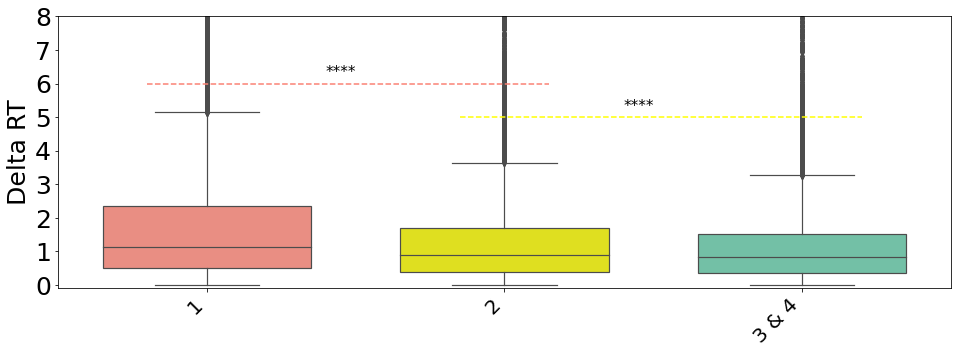

In [58]:
plt.figure(1, figsize=(16,5))
Group1=pd.concat([rt_3,rt_5,rt_2,rt_4])
Group2=pd.concat([rt_CDAP_Frag,rt_CDAP_MQ,rt_CDAP_PNNL,rt_MQ_Frag,rt_PNNL_Frag,rt_PNNL_MQ])
Group3=pd.concat([rt_CDAP_MQ_Frag,rt_CDAP_PNNL_Frag,rt_CDAP_PNNL_MQ,rt_PNNL_MQ_Frag,rt_CDAP_PNNL_MQ_Frag])
g=[Group1,Group2,Group3]
x = np.array(['1','2','3 & 4'])
Group = np.repeat(x, [len(Group1),len(Group2),len(Group3)], axis=0)
d = {'col1': np.array(pd.concat([Group1,Group2,Group3])), 'col2': Group}
#colors = ['mediumpurple','dodgerblue','steelblue','royalblue','cornflowerblue']
df = pd.DataFrame(data=d)
my_pal = {"1": "salmon", 
          "2":"yellow",
          '3 & 4':"mediumaquamarine"
         }
g = sns.boxplot(data=df, x='col2', y='col1',
                   palette=my_pal,linewidth=1.2,width=0.7)
plt.xlabel('')
plt.ylabel('Delta RT',size=25)
plt.xticks(size=20, rotation=45, ha='right')
plt.yticks(size=25)
g.set_ylim(-0.1,8)
plt.axhline(y=6,xmin=0.1,xmax=0.55,color='salmon', linestyle='--')
plt.axhline(y=5,xmin=0.45,xmax=0.9,color='yellow', linestyle='--')
#plt.axhline(y=4,xmin=0.58,xmax=0.94,color='mediumaquamarine', linestyle='--')
p1=sts.ttest_ind(np.array(Group1.tolist()),np.array(Group2.tolist()))[1]
plt.text(0.4, 6.2,'****',size=15)
p2=sts.ttest_ind(np.array(Group2.tolist()),np.array(Group3.tolist()))[1]
plt.text(1.4, 5.2,'****',size=15)
p3=sts.ttest_ind(np.array(Group3.tolist()),np.array(Group4.tolist()))[1]
print(p1)
print(p2)
print(p3)
plt.savefig('../plot/Sup_Figure4_DeltaRT_boxplot_zoom.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarn

<Figure size 720x720 with 0 Axes>

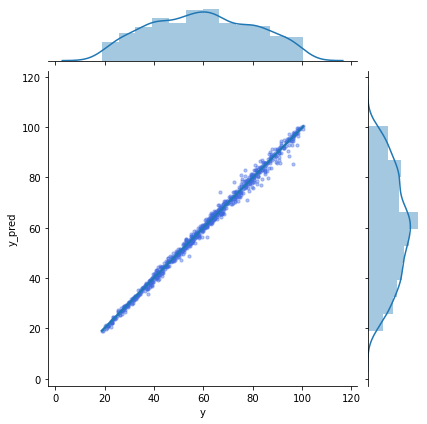

In [65]:
#Figure 4b
plt.figure(1, figsize=(10,10))
g = sns.JointGrid(x=AutoRT_test_rt.y, y=AutoRT_test_rt.y_pred,space=0.2)
g = g.plot_joint(sns.regplot,fit_reg=True, scatter_kws={"color":"royalblue","alpha":0.4,"s":10})
plt.xlabel('RT_observed',size=18)
plt.ylabel('RT_predicted',size=18)
plt.xticks(size=15)
plt.yticks(size=15)
g = g.plot_marginals(sns.distplot, kde=True)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('../plot/Figure4a_scatter_test.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarn

<Figure size 720x720 with 0 Axes>

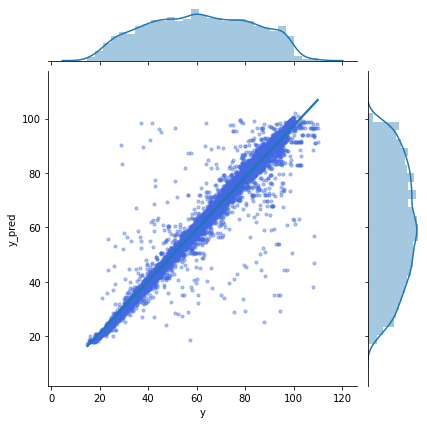

In [67]:
#Figure 4c
plt.figure(1, figsize=(10,10))
g = sns.JointGrid(x=AutoRT_michi_rt_2.y, y=AutoRT_michi_rt_2.y_pred,space=0.2)
g = g.plot_joint(sns.regplot,fit_reg=True, scatter_kws={"color":"royalblue","alpha":0.4,"s":10})
plt.xlabel('RT_observed',size=18)
plt.ylabel('RT_predicted',size=18)
plt.xticks(size=15)
plt.yticks(size=15)
#plt.annotate('Spearman Corr='+str(round(sts.spearmanr(AutoRT_michi_rt_2.y, AutoRT_michi_rt_2.y_pred)[0],4)),(60,110),horizontalalignment='center',size=16)
g = g.plot_marginals(sns.distplot, kde=True)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('../plot/Figure4_scatter_FragPipe.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarn

<Figure size 720x720 with 0 Axes>

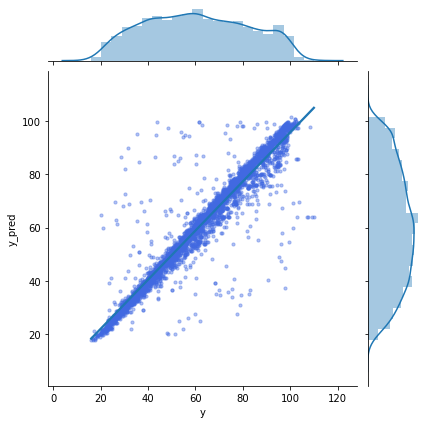

In [66]:
#Supplementary Figure 2
plt.figure(1, figsize=(10,10))
g = sns.JointGrid(x=AutoRT_maxquant_rt.y, y=AutoRT_maxquant_rt.y_pred,space=0.2)
g = g.plot_joint(sns.regplot,fit_reg=True, scatter_kws={"color":"royalblue","alpha":0.4,"s":10})
plt.xlabel('RT_observed',size=18)
plt.ylabel('RT_predicted',size=18)
plt.xticks(size=15)
plt.yticks(size=15)
#plt.annotate('Spearman Corr='+str(round(sts.spearmanr(AutoRT_maxquant_rt.y, AutoRT_maxquant_rt.y_pred)[0],4)),(60,110),horizontalalignment='center',size=16)

g = g.plot_marginals(sns.distplot, kde=True)

plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('../plot/Sup_Figure3_scatter_maxquant.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

In [77]:
#Supplementary Figure 3c
rt_3_all = abs(AutoRT_maxquant_rt_all.y - AutoRT_maxquant_rt_all.y_pred)
rt_5_all = abs(AutoRT_michi_rt_2_all.y - AutoRT_michi_rt_2_all.y_pred)
rt_2_all = abs(AutoRT_PNNL_rt_all.y - AutoRT_PNNL_rt_all.y_pred)
rt_4_all = abs(AutoRT_CDAP_rt_all.y - AutoRT_CDAP_rt_all.y_pred)
rt = abs(AutoRT_test_rt.y - AutoRT_test_rt.y_pred)
rt_3 = abs(AutoRT_maxquant_rt.y - AutoRT_maxquant_rt.y_pred)
rt_5 = abs(AutoRT_michi_rt_2.y - AutoRT_michi_rt_2.y_pred)
rt_2 = abs(AutoRT_PNNL_rt.y - AutoRT_PNNL_rt.y_pred)
rt_4 = abs(AutoRT_CDAP_rt.y - AutoRT_CDAP_rt.y_pred)

In [78]:
AutoRT_maxquant_rt_all['deltart']=np.array(rt_3_all)
AutoRT_michi_rt_2_all['deltart']=np.array(rt_5_all)
AutoRT_PNNL_rt_all['deltart']=np.array(rt_2_all)
AutoRT_CDAP_rt_all['deltart']=np.array(rt_4_all)
AutoRT_test_rt['deltart']=np.array(rt)
AutoRT_maxquant_rt['deltart']=np.array(rt_3)
AutoRT_michi_rt_2['deltart']=np.array(rt_5)
AutoRT_PNNL_rt['deltart']=np.array(rt_2)
AutoRT_CDAP_rt['deltart']=np.array(rt_4)

In [79]:
data=[AutoRT_test_rt,AutoRT_PNNL_rt_all,AutoRT_CDAP_rt_all,AutoRT_maxquant_rt_all,AutoRT_michi_rt_2_all]
for i in range(5):
    tmp=data[i]
    length=[]
    for j in range(len(tmp)):
        length.append(len(list(tmp.iloc[j,0])))
    tmp['peplength']=np.array(length)
    data[i]=tmp
#pep length
Pep_Length=[]
Pep_Num=[]
Med_rt=[]
data=[AutoRT_test_rt,AutoRT_PNNL_rt_all,AutoRT_CDAP_rt_all,AutoRT_maxquant_rt_all,AutoRT_michi_rt_2_all]
for i in range(0,5):
    df=data[i]
    pep_len=df.peplength.tolist()
    length=list(set(df.peplength))
    num=[]
    group=[]
    rt=[]
    for j in length:
        num.append(pep_len.count(j))
        group.append(j)
        rt.append(np.average(df[df.peplength==j].deltart))
    Pep_Length.append(group)
    Pep_Num.append(num)
    Med_rt.append(rt)

<ipython-input-80-a35a5224c928>:35: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Sup_Figure3c_peplength_all.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


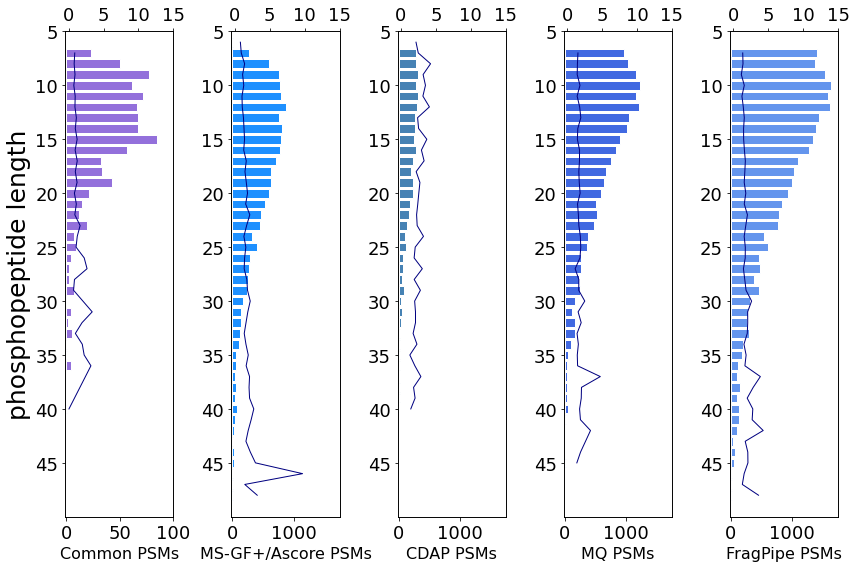

In [80]:
# Values of each group
# The position of the bars on the x-axis
# Names of group and bar width
#plt.figure(1, figsize=(12,12))
names = ['Common PSMs','MS-GF+/Ascore PSMs','CDAP PSMs','MQ PSMs','FragPipe PSMs']
tmp=['phosphopeptide length','','','','']
barWidth = 0.9
c=['mediumpurple','dodgerblue','steelblue','royalblue','cornflowerblue']
fig, axs = plt.subplots(1, 5, figsize=(12,8))
axs[0].set_ylabel('phosphopeptide length',size=25)
for i in range(0,5):
    r = Pep_Length[i]
    axs[i].barh(r,Pep_Num[i],color=c[i], edgecolor='white')
    axs[i].invert_yaxis()
    axs[i].set_xlabel(names[i],size=16)
    #ax1[i].ylabel(tmp[i-1],size=10,weight='bold')
    axs[i].set_ylim(50,5)
    axs[i].set_yticks(range(5,50,5))
    for tick in axs[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for tick in axs[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    if i==0:
        axs[i].set_xlim(-1,100)
    else:
        axs[i].set_xlim(-18,1750)
        axs[i].set_xticks(range(0,1750,1000))
    ax2 = axs[i].twiny()
    ax2.plot(Med_rt[i],r, color='navy',lw=1)
    ax2.set_xlim(-0.5,15)
    ax2.set_xticks(range(0,20,5))
    for label in ax2.xaxis.get_majorticklabels():
        label.set_fontsize(18)
    fig.tight_layout()
plt.savefig('../plot/Sup_Figure3c_peplength_all.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
plt.show()

In [81]:
data=[AutoRT_test_rt,AutoRT_PNNL_rt,AutoRT_CDAP_rt,AutoRT_maxquant_rt,AutoRT_michi_rt_2]
for i in range(5):
    tmp=data[i]
    length=[]
    for j in range(len(tmp)):
        length.append(len(list(tmp.iloc[j,0])))
    tmp['peplength']=np.array(length)
    data[i]=tmp
#pep length
Pep_Length=[]
Pep_Num=[]
Med_rt=[]
data=[AutoRT_test_rt,AutoRT_PNNL_rt,AutoRT_CDAP_rt,AutoRT_maxquant_rt,AutoRT_michi_rt_2]
for i in range(0,5):
    df=data[i]
    pep_len=df.peplength.tolist()
    length=list(set(df.peplength))
    num=[]
    group=[]
    rt=[]
    for j in length:
        num.append(pep_len.count(j))
        group.append(j)
        rt.append(np.average(df[df.peplength==j].deltart))
    Pep_Length.append(group)
    Pep_Num.append(num)
    Med_rt.append(rt)

<ipython-input-82-850ab3857d00>:35: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Sup_Figure3c_peplength_unique.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


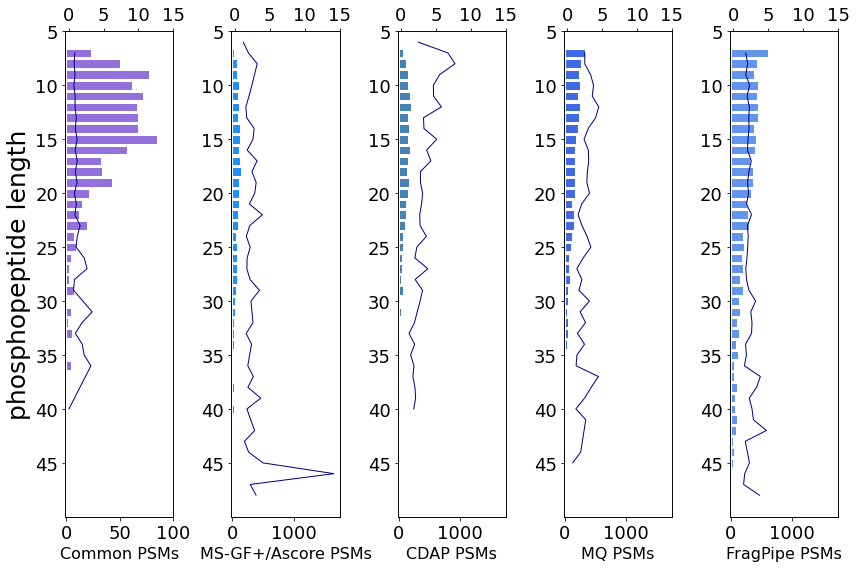

In [82]:
# Values of each group
# The position of the bars on the x-axis
# Names of group and bar width
#plt.figure(1, figsize=(12,12))
names = ['Common PSMs','MS-GF+/Ascore PSMs','CDAP PSMs','MQ PSMs','FragPipe PSMs']
tmp=['phosphopeptide length','','','','']
barWidth = 0.9
c=['mediumpurple','dodgerblue','steelblue','royalblue','cornflowerblue']
fig, axs = plt.subplots(1, 5, figsize=(12,8))
axs[0].set_ylabel('phosphopeptide length',size=25)
for i in range(0,5):
    r = Pep_Length[i]
    axs[i].barh(r,Pep_Num[i],color=c[i], edgecolor='white')
    axs[i].invert_yaxis()
    axs[i].set_xlabel(names[i],size=16)
    #ax1[i].ylabel(tmp[i-1],size=10,weight='bold')
    axs[i].set_ylim(50,5)
    axs[i].set_yticks(range(5,50,5))
    for tick in axs[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for tick in axs[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    if i==0:
        axs[i].set_xlim(-1,100)
    else:
        axs[i].set_xlim(-18,1750)
        axs[i].set_xticks(range(0,1750,1000))
    ax2 = axs[i].twiny()
    ax2.plot(Med_rt[i],r, color='navy',lw=1)
    ax2.set_xlim(-0.5,15)
    ax2.set_xticks(range(0,20,5))
    for label in ax2.xaxis.get_majorticklabels():
        label.set_fontsize(18)
    fig.tight_layout()
plt.savefig('../plot/Sup_Figure3c_peplength_unique.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
plt.show()

In [ ]:
#Figure 4d

<ipython-input-84-662e24642a3c>:36: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure4d_DeltaRT_boxplot_zoom.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


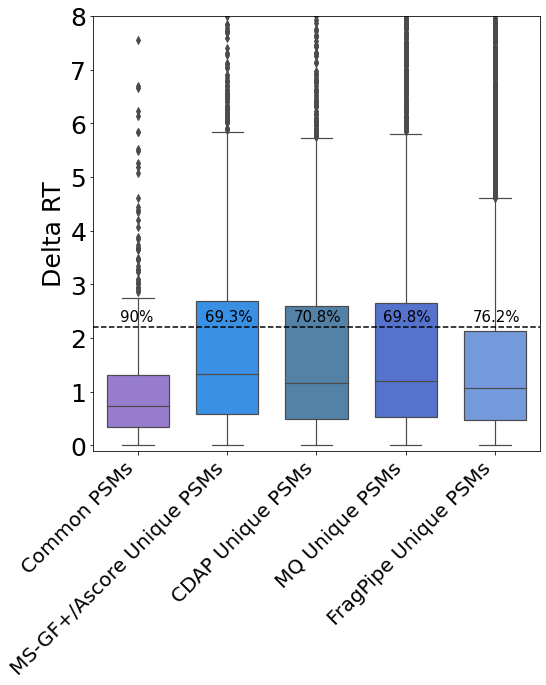

In [84]:
plt.figure(1, figsize=(8,8))
rt = abs(AutoRT_test_rt.y - AutoRT_test_rt.y_pred)
rt_3 = abs(AutoRT_maxquant_rt.y - AutoRT_maxquant_rt.y_pred)
rt_5 = abs(AutoRT_michi_rt_2.y - AutoRT_michi_rt_2.y_pred)
rt_2 = abs(AutoRT_PNNL_rt.y - AutoRT_PNNL_rt.y_pred)
rt_4 = abs(AutoRT_CDAP_rt.y - AutoRT_CDAP_rt.y_pred)
g=[rt,rt_2,rt_4,rt_3,rt_5]
x = np.array(['Common PSMs','MS-GF+/Ascore Unique PSMs','CDAP Unique PSMs','MQ Unique PSMs','FragPipe Unique PSMs'])
Group = np.repeat(x, [len(rt),len(rt_2),len(rt_4),len(rt_3),len(rt_5)], axis=0)
d = {'col1': np.array(pd.concat([rt,rt_2,rt_4,rt_3,rt_5])), 'col2': Group}
colors = ['mediumpurple','dodgerblue','steelblue','royalblue','cornflowerblue']
df = pd.DataFrame(data=d)
my_pal = {"Common PSMs": "mediumpurple", 
                          "MS-GF+/Ascore Unique PSMs": "dodgerblue", 
                          "CDAP Unique PSMs":"steelblue",
                          'MQ Unique PSMs':"royalblue",
                          'FragPipe Unique PSMs':"cornflowerblue"}
g = sns.boxplot(data=df, x='col2', y='col1',
                   palette=my_pal,linewidth=1.2,width=0.7)
plt.xlabel('')
plt.ylabel('Delta RT',size=25)
plt.xticks(size=20, rotation=45, ha='right')
plt.yticks(size=25)
g.set_ylim(-0.1,8)
Q=sorted(rt)[766]
p_pnnl=len(rt_2[rt_2<Q])/len(rt_2)
p_cdap=len(rt_4[rt_4<Q])/len(rt_4)
p_mq=len(rt_3[rt_3<Q])/len(rt_3)
p_fp=len(rt_5[rt_5<Q])/len(rt_5)
plt.axhline(y=Q, color='black', linestyle='--')
plt.text(-0.2, Q+0.1,str(90)+'%',size=15)
plt.text(0.75, Q+0.1,str(round(p_pnnl,3)*100)+'%',size=15)
plt.text(1.75, Q+0.1,str(round(p_cdap,3)*100)+'%',size=15)
plt.text(2.75, Q+0.1,str(round(p_mq,3)*100)+'%',size=15)
plt.text(3.75, Q+0.1,str(round(p_fp,3)*100)+'%',size=15)
plt.savefig('../plot/Figure4d_DeltaRT_boxplot_zoom.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

In [ ]:
#AutoRT part ends

In [ ]:
#pDeep2 starts

In [2]:
maxquant_Autort=pd.read_pickle('../data/AutoRT_data/UCEC/prediction/maxquant_Autort.pkl')
Michi_Autort=pd.read_pickle('../data/AutoRT_data/UCEC/prediction/Michi_Autort.pkl')
PNNL_Autort=pd.read_pickle('../data/AutoRT_data/UCEC/prediction/PNNL_Autort.pkl')
CDAP_Autort=pd.read_pickle('../data/AutoRT_data/UCEC/prediction/CDAP_Autort.pkl')
overlap_Autort=pd.read_pickle('../data/AutoRT_data/UCEC/prediction/overlap_Autort.pkl')

In [3]:
data=[maxquant_Autort,Michi_Autort,PNNL_Autort,CDAP_Autort,overlap_Autort]
name=['MaxQuant','Michi','PNNL','CDAP','overlap']
for i in range(0,5):
    convert_to_psmtxt(data[i],name[i])

In [ ]:
#Group2
MQ_Frag_group2_df=pd.DataFrame()
for i in range(len(MQ_Frag_group2)):
    exp=MQ_Frag_group2[i][0]
    scan=MQ_Frag_group2[i][1]
    tmp=df_maxquant_T.loc[exp]
    tmp=tmp[tmp.scan==scan]
    MQ_Frag_group2_df=pd.concat([MQ_Frag_group2_df,tmp])
PNNL_MQ_group2_df=pd.DataFrame()
for i in range(len(PNNL_MQ_group2)):
    exp=PNNL_MQ_group2[i][0]
    scan=PNNL_MQ_group2[i][1]
    tmp=df_maxquant_T.loc[exp]
    tmp=tmp[tmp.scan==scan]
    PNNL_MQ_group2_df=pd.concat([PNNL_MQ_group2_df,tmp])
CDAP_MQ_group2_df=pd.DataFrame()
for i in range(len(CDAP_MQ_group2)):
    exp=CDAP_MQ_group2[i][0]
    scan=CDAP_MQ_group2[i][1]
    tmp=df_maxquant_T.loc[exp]
    tmp=tmp[tmp.scan==scan]
    CDAP_MQ_group2_df=pd.concat([CDAP_MQ_group2_df,tmp])
PNNL_Frag_group2_df=pd.DataFrame()
for i in range(len(PNNL_Frag_group2)):
    exp=PNNL_Frag_group2[i][0]
    scan=PNNL_Frag_group2[i][1]
    tmp=Michi_2.loc[exp]
    tmp=tmp[tmp.scan==scan]
    PNNL_Frag_group2_df=pd.concat([PNNL_Frag_group2_df,tmp])
CDAP_Frag_group2_df=pd.DataFrame()
for i in range(len(CDAP_Frag_group2)):
    exp=CDAP_Frag_group2[i][0]
    scan=CDAP_Frag_group2[i][1]
    tmp=Michi_2.loc[exp]
    tmp=tmp[tmp.scan==scan]
    CDAP_Frag_group2_df=pd.concat([CDAP_Frag_group2_df,tmp])
CDAP_PNNL_group2_df=pd.DataFrame()
for i in range(len(CDAP_PNNL_group2)):
    exp=CDAP_PNNL_group2[i][0]
    scan=CDAP_PNNL_group2[i][1]
    tmp=CDAP.loc[exp]
    tmp=tmp[tmp.scan==scan]
    CDAP_PNNL_group2_df=pd.concat([CDAP_PNNL_group2_df,tmp])

In [ ]:
data=[MQ_Frag_group2_df, PNNL_Frag_group2_df, CDAP_Frag_group2_df, PNNL_MQ_group2_df, 
      CDAP_MQ_group2_df, CDAP_PNNL_group2_df]
name=['MQ_Frag', 'PNNL_Frag', 'CDAP_Frag', 'PNNL_MQ', 
      'CDAP_MQ', 'CDAP_PNNL']
for i in range(0,6):
    convert_to_psmtxt(data[i],name[i])

In [ ]:
#Group3
PNNL_MQ_Frag_group3_df=pd.DataFrame()
for i in range(len(PNNL_MQ_Frag_group3)):
    exp=PNNL_MQ_Frag_group3[i][0]
    scan=PNNL_MQ_Frag_group3[i][1]
    tmp=df_maxquant_T.loc[exp]
    tmp=tmp[tmp.scan==scan]
    PNNL_MQ_Frag_group3_df=pd.concat([PNNL_MQ_Frag_group3_df,tmp])

CDAP_MQ_Frag_group3_df=pd.DataFrame()
for i in range(len(CDAP_MQ_Frag_group3)):
    exp=CDAP_MQ_Frag_group3[i][0]
    scan=CDAP_MQ_Frag_group3[i][1]
    tmp=df_maxquant_T.loc[exp]
    tmp=tmp[tmp.scan==scan]
    CDAP_MQ_Frag_group3_df=pd.concat([CDAP_MQ_Frag_group3_df,tmp])

CDAP_PNNL_Frag_group3_df=pd.DataFrame()
for i in range(len(CDAP_PNNL_Frag_group3)):
    exp=CDAP_PNNL_Frag_group3[i][0]
    scan=CDAP_PNNL_Frag_group3[i][1]
    tmp=CDAP.loc[exp]
    tmp=tmp[tmp.scan==scan]
    CDAP_PNNL_Frag_group3_df=pd.concat([CDAP_PNNL_Frag_group3_df,tmp])
    
CDAP_PNNL_MQ_group3_df=pd.DataFrame()
for i in range(len(CDAP_PNNL_MQ_group3)):
    exp=CDAP_PNNL_MQ_group3[i][0]
    scan=CDAP_PNNL_MQ_group3[i][1]
    tmp=CDAP.loc[exp]
    tmp=tmp[tmp.scan==scan]
    CDAP_PNNL_MQ_group3_df=pd.concat([CDAP_PNNL_MQ_group3_df,tmp])

In [ ]:
data=[PNNL_MQ_Frag_group3_df,CDAP_MQ_Frag_group3_df,CDAP_PNNL_MQ_group3_df,CDAP_PNNL_Frag_group3_df]
name=['PNNL_MQ_Frag','CDAP_MQ_Frag','CDAP_PNNL_MQ','CDAP_PNNL_Frag']
for i in range(0,4):
    convert_to_psmtxt(data[i],name[i])

In [ ]:
#Group4
CDAP_PNNL_MQ_Frag_df=pd.DataFrame()
CDAP_PNNL_MQ_Frag=list(CDAP_PNNL_MQ_Frag)
for i in range(len(CDAP_PNNL_MQ_Frag)):
    exp=CDAP_PNNL_MQ_Frag[i][0]
    scan=CDAP_PNNL_MQ_Frag[i][1]
    tmp=CDAP.loc[exp]
    tmp=tmp[tmp.scan==scan]
    CDAP_PNNL_MQ_Frag_df=pd.concat([CDAP_PNNL_MQ_Frag_df,tmp])
convert_to_psmtxt(CDAP_PNNL_MQ_Frag_df,'CDAP_PNNL_MQ_Frag')

In [4]:
#pDeep2 results
test = pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/UCEC-mod-pcc_6ions.txt',header=0)
test=test.dropna()
maxquant = pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/maxquant-mod-pcc_6ions.txt',header=0)
maxquant=maxquant.dropna()
Michi = pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/Michi-mod-pcc_6ions.txt',header=0)
Michi=Michi.dropna()
CDAP=pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/CDAP-mod-pcc_6ions.txt',header=0)
CDAP=CDAP.dropna()
PNNL=pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/PNNL-mod-pcc_6ions.txt',header=0)
PNNL=PNNL.dropna()

In [5]:
#pDeep2 results
pDeep2_CDAP_Frag=pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/UCEC_CDAP_Frag-mod-pcc_6ions.txt',header=0)
pDeep2_CDAP_MQ_Frag=pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/UCEC_CDAP_MQ_Frag-mod-pcc_6ions.txt',header=0)
pDeep2_CDAP_MQ=pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/UCEC_CDAP_MQ-mod-pcc_6ions.txt',header=0)
pDeep2_CDAP_PNNL_Frag=pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/UCEC_CDAP_PNNL_Frag-mod-pcc_6ions.txt',header=0)
pDeep2_CDAP_PNNL=pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/UCEC_CDAP_PNNL-mod-pcc_6ions.txt',header=0)
pDeep2_CDAP_PNNL_MQ_Frag=pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/UCEC_CDAP_PNNL_MQ_Frag-mod-pcc_6ions.txt',header=0)
pDeep2_CDAP_PNNL_MQ=pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/UCEC_CDAP_PNNL_MQ-mod-pcc_6ions.txt',header=0)
pDeep2_MQ_Frag=pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/UCEC_MQ_Frag-mod-pcc_6ions.txt',header=0)
pDeep2_PNNL_Frag=pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/UCEC_PNNL_Frag-mod-pcc_6ions.txt',header=0)
pDeep2_PNNL_MQ_Frag=pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/UCEC_PNNL_MQ_Frag-mod-pcc_6ions.txt',header=0)
pDeep2_PNNL_MQ=pd.read_table('../data/pDeep2_results/8_8_2021_pretrain_UCEC/UCEC_PNNL_MQ-mod-pcc_6ions.txt',header=0)

0.0
1.4226297930340097e-255


<ipython-input-7-76433a628d0d>:41: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Sup_Figure3b_PCC_boxplot_zoom.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


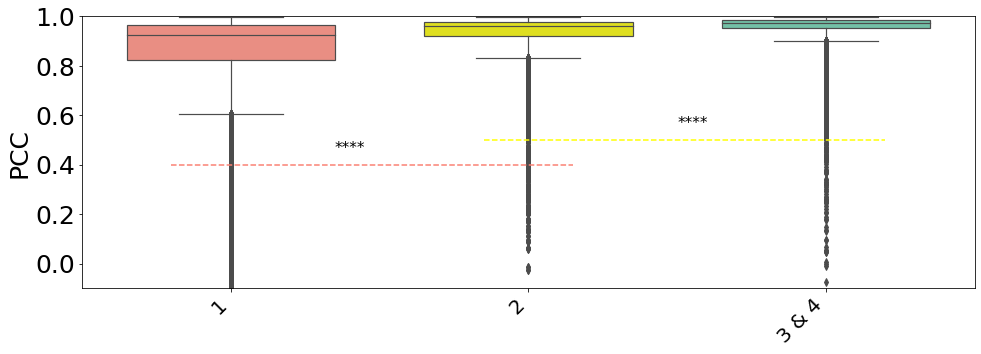

In [7]:
#Supplementary Figure3b
#p-value annotation legend:
#ns: 5.00e-02 < p <= 1.00e+00
#*: 1.00e-02 < p <= 5.00e-02
#**: 1.00e-03 < p <= 1.00e-02
#***: 1.00e-04 < p <= 1.00e-03
#****: p <= 1.00e-04
plt.figure(1, figsize=(16,5))
Group1=pd.concat([Michi['pcc'],maxquant['pcc'],PNNL['pcc'],CDAP['pcc']])
Group1=Group1.dropna()
Group2=pd.concat([pDeep2_MQ_Frag['pcc'],pDeep2_PNNL_Frag['pcc'],pDeep2_CDAP_PNNL['pcc'],pDeep2_MQ_Frag['pcc'],pDeep2_PNNL_Frag['pcc'],pDeep2_PNNL_MQ['pcc']])
Group2=Group2.dropna()
Group3=pd.concat([pDeep2_CDAP_MQ_Frag['pcc'],pDeep2_CDAP_PNNL_Frag['pcc'],
                  pDeep2_CDAP_PNNL_MQ['pcc'],pDeep2_PNNL_MQ_Frag['pcc'],pDeep2_CDAP_PNNL_MQ_Frag['pcc']])
Group3=Group3.dropna()
g=[Group1,Group2,Group3]
x = np.array(['1','2','3 & 4'])
Group = np.repeat(x, [len(Group1),len(Group2),len(Group3)], axis=0)
d = {'col1': np.array(pd.concat([Group1,Group2,Group3])), 'col2': Group}
df = pd.DataFrame(data=d)
my_pal = {"1": "salmon", 
          "2":"yellow",
          '3 & 4':"mediumaquamarine"
         }
g = sns.boxplot(data=df, x='col2', y='col1',
                   palette=my_pal,linewidth=1.2,width=0.7)
plt.xlabel('')
plt.ylabel('PCC',size=25)
plt.xticks(size=20, rotation=45, ha='right')
plt.yticks(size=25)
g.set_ylim(-0.1,1)
plt.axhline(y=0.4,xmin=0.1,xmax=0.55,color='salmon', linestyle='--')
plt.axhline(y=0.5,xmin=0.45,xmax=0.9,color='yellow', linestyle='--')
#plt.axhline(y=0.6,xmin=0.58,xmax=0.94,color='mediumaquamarine', linestyle='--')
p1=sts.ttest_ind(np.array(Group1.tolist()),np.array(Group2.tolist()))[1]
plt.text(0.35, 0.45,'****',size=15)
p2=sts.ttest_ind(np.array(Group2.tolist()),np.array(Group3.tolist()))[1]
plt.text(1.5, 0.55,'****',size=15)
print(p1)
print(p2)
plt.savefig('../plot/Sup_Figure3b_PCC_boxplot_zoom.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MQ Unique PSMs v.s. FragPipe Unique PSMs: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.207e-17 U_stat=1.395e+07
CDAP Unique PSMs v.s. FragPipe Unique PSMs: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.230e-19 U_stat=9.985e+06
MS-GF+/Ascore Unique PSMs v.s. FragPipe Unique PSMs: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.422e-64 U_stat=1.944e+07


<ipython-input-8-d45453d3a738>:36: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure4e_PCC_boxplot_PCC.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


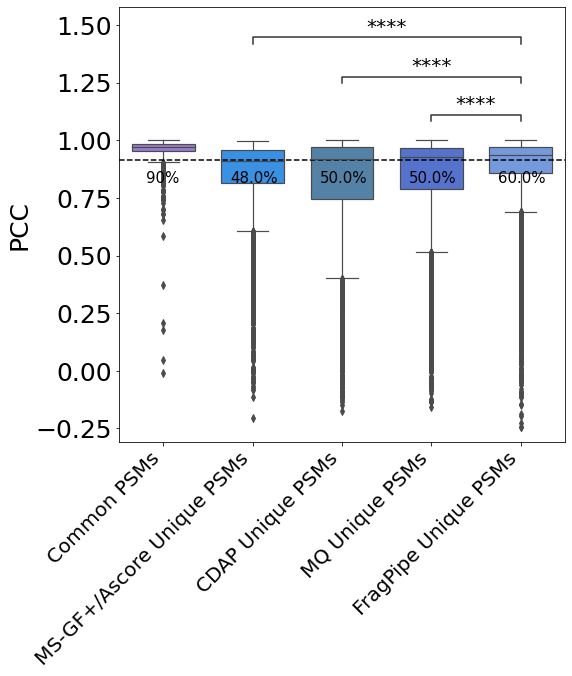

In [8]:
#Figure 4e
plt.figure(1, figsize=(8,8))
x = np.array(['Common PSMs','MS-GF+/Ascore Unique PSMs','CDAP Unique PSMs',
              'MQ Unique PSMs','FragPipe Unique PSMs'])
Group = np.repeat(x, [len(test['pcc']),len(PNNL['pcc']),len(CDAP['pcc']),len(maxquant['pcc']),len(Michi['pcc'])], axis=0)
d = {'col1': test['pcc'].tolist()+PNNL['pcc'].tolist()+CDAP['pcc'].tolist()+maxquant['pcc'].tolist()+Michi['pcc'].tolist(), 'col2': Group}
df = pd.DataFrame(data=d)
my_pal = {"Common PSMs": "mediumpurple", 
                          "MS-GF+/Ascore Unique PSMs": "dodgerblue", 
                          "CDAP Unique PSMs":"steelblue",
                          'MQ Unique PSMs':"royalblue",
                          'FragPipe Unique PSMs':"cornflowerblue"}
g = sns.boxplot(data=df, x='col2', y='col1',
                   palette=my_pal,linewidth=1.2,width=0.7)
plt.ylabel('PCC',size=25)
plt.xlabel('')
plt.xticks(size=20, rotation=45, ha='right')
plt.yticks(size=25)
Q=sorted(test['pcc'].tolist())[112]
p_pnnl=len([q for q in PNNL['pcc'].tolist() if q>Q])/len(PNNL['pcc'].tolist())
p_cdap=len([q for q in CDAP['pcc'].tolist() if q>Q])/len(CDAP['pcc'].tolist())
p_mq=len([q for q in maxquant['pcc'].tolist() if q>Q])/len(maxquant['pcc'].tolist())
p_fp=len([q for q in Michi['pcc'].tolist() if q>Q])/len(Michi['pcc'].tolist())
plt.axhline(y=Q, color='black', linestyle='--')
plt.text(-0.2, Q-0.1,str(90)+'%',size=15)
plt.text(0.75, Q-0.1,str(round(p_pnnl,2)*100)+'%',size=15)
plt.text(1.75, Q-0.1,str(round(p_cdap,1)*100)+'%',size=15)
plt.text(2.75, Q-0.1,str(round(p_mq,1)*100)+'%',size=15)
plt.text(3.75, Q-0.1,str(round(p_fp,2)*100)+'%',size=15)
test_results = add_stat_annotation(g, data=df, x='col2', y='col1',
                                   box_pairs=[("FragPipe Unique PSMs","MQ Unique PSMs"),
                                              ("FragPipe Unique PSMs","MS-GF+/Ascore Unique PSMs"),
                                              ("FragPipe Unique PSMs","CDAP Unique PSMs")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=2,fontsize=20)
plt.savefig('../plot/Figure4e_PCC_boxplot_PCC.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

In [ ]:
#pDeep2 ends